In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset in python notebook

df=pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.shape

(1000, 11)

The datset contains 9 features and 'Risk' is the target variable as mentioned.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


1. Total samples in the dataset are 1000.
2. Only Saving accounts and Checking account contains missing values.
3. There are four features of integer type, five features of object type and the target variable is of object type.
4. There are no incorrect data type in the dataset.

In [5]:
df.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


##### i) Missing Values

In [6]:
missing_values_series=df.isnull().sum()
missing_columns=missing_values_series[missing_values_series>0]
missing_columns_df=(missing_columns.sort_values()/df.shape[0])*100
x_col="Attributes"
y_col="Missing Pct %"
missing_columns_df=pd.DataFrame(data=np.column_stack([missing_columns_df.index,missing_columns_df.values]),columns=[x_col,y_col])
missing_columns_df

,Attributes,Missing Pct %
0,Saving accounts,18.3
1,Checking account,39.4


As the the total number of missing data is quite low than non missing data, I will impute the missing data with mode.

In [7]:
df=df.fillna(df.mode().iloc[0])
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

##### ii) Unique Values

In [8]:
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

##### iii) Duplicate Values

In [9]:
df.duplicated().sum()

0

The dataset doesn't contains any duplicated values.

In [10]:
# Removing 'Unnamed: 0' column from the data set as it is not considered a relevant feature

df=df.drop('Unnamed: 0',axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### 2. Perform Exploratory Data Analysis

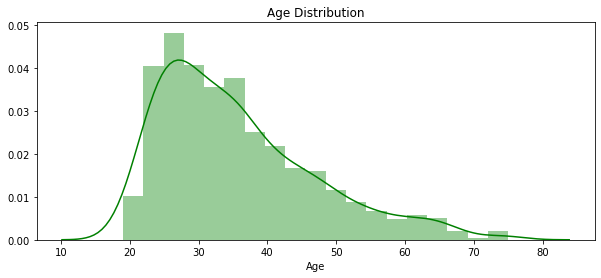

Skewness: 1.02


In [11]:
# Age Distribution

fig_dims = (10, 4)
fig, ax =  plt.subplots(figsize=fig_dims)
ax1 = sns.distplot(df['Age'], ax=ax, color='green')
ax1.set_xlabel('Age')
ax1.set_title('Age Distribution')
plt.show()

print("Skewness:", df.Age.skew().round(2))

- Minimum age of people is 19 and maximum age is 75.
- From the plot, it can be observed that the distribution is positively skewed.
- Most people have age around 28.
- As age is a continuous variable, a histogram describes the age distribution quite well.

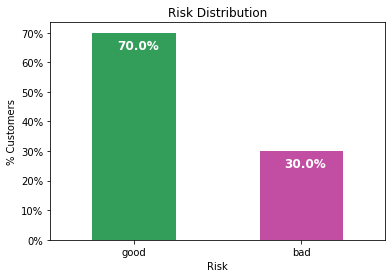

In [12]:
import matplotlib.ticker as mtick
colors = ['#339e5a','#c24ea3']
ax = (df['Risk'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Risk')
ax.set_title('Risk Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

- The bar plot above shows comparison among two types of Risk which is the target variable.
- From the plot, it can be seen that 70% of customers have good risk and 30% of customers have bad risk. 

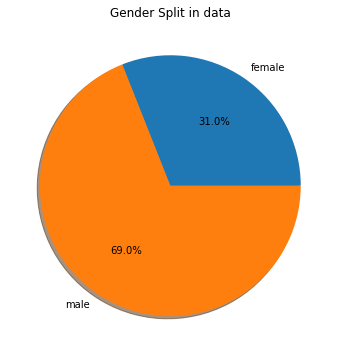

In [13]:
data_Sex = df.groupby('Sex')['Sex'].count()
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.figure(figsize = (6,6))
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');

- The pie chart above shows percentage count of gender types of people.
- 69% of people are males and 31% are females.

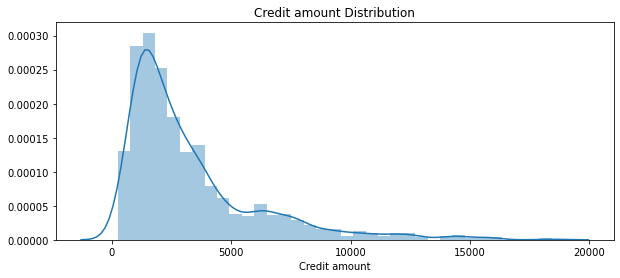

Skewness: 1.95


In [14]:
# Credit Amount Distribution

fig_dims = (10, 4)
fig, ax =  plt.subplots(figsize=fig_dims)
ax1 = sns.distplot(df['Credit amount'], ax=ax)
ax1.set_xlabel('Credit amount')
ax1.set_title('Credit amount Distribution')
plt.show()

print("Skewness:", df['Credit amount'].skew().round(2))

- The histogram above displays distribution of credit amount of people.
- Minimum credit amount is 250 and maximum credit amount is close to 20000.
- The distribution is positively skewed with most people having credit amount of 1300 (seen from data description)

Text(0.5, 1.0, '# of Customers by their duration')

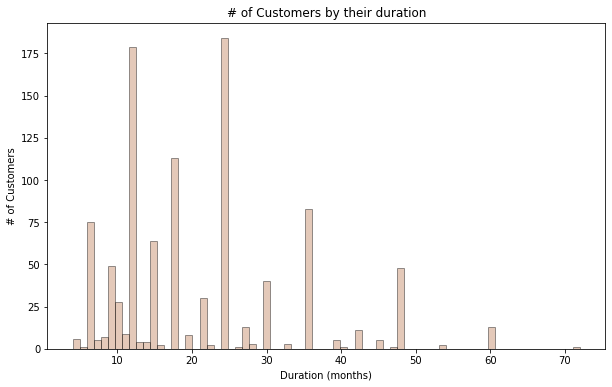

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(10,6))
ax = sns.distplot(df['Duration'], hist=True, kde=False, 
             bins=72, color = '#bd7a51', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Duration (months)')
ax.set_title('# of Customers by their duration')

- The plot above shows number of people by their credit duration in months.
- It is observed that most people have credit duration of 25 months followed by 13 months. 

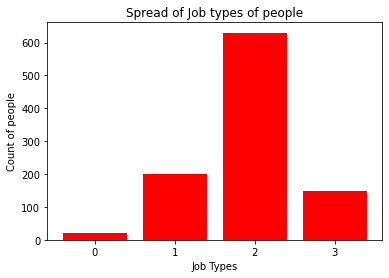

In [16]:
data_job = df['Job'].value_counts();
plt.bar(data_job.index,data_job.values,color ='r');
plt.xticks(data_job.index);
plt.xlabel('Job Types');
plt.ylabel('Count of people');
plt.title('Spread of Job types of people');

- The bar plot aboves shows count of people with their job types.
- It is observed that most people have Job type 2 and Job type 0 has lowest number of people. 

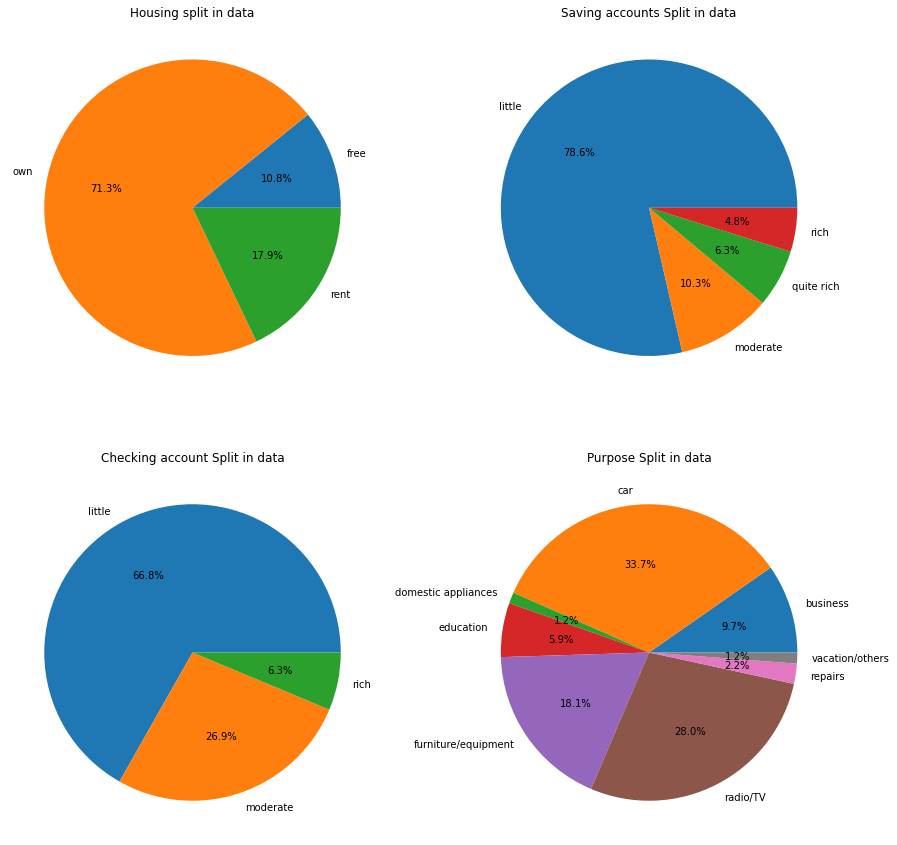

In [17]:
data_Housing = df.groupby('Housing')['Housing'].count()
data_Savingaccounts = df.groupby('Saving accounts')['Saving accounts'].count()
data_Checkingaccount = df.groupby('Checking account')['Checking account'].count()
data_Purpose = df.groupby('Purpose')['Purpose'].count()

data_Housing = pd.DataFrame({'Housing':data_Housing.index, 'Count':data_Housing.values})
data_Savingaccounts = pd.DataFrame({'Saving accounts':data_Savingaccounts.index, 'Count':data_Savingaccounts.values})
data_Checkingaccount = pd.DataFrame({'Checking account':data_Checkingaccount.index, 'Count':data_Checkingaccount.values})
data_Purpose = pd.DataFrame({'Purpose':data_Purpose.index, 'Count':data_Purpose.values})

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_Housing['Count'],labels = data_Housing['Housing'],autopct='%1.1f%%');
plt.title('Housing split in data');

ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_Savingaccounts['Count'],labels = data_Savingaccounts['Saving accounts'],autopct='%1.1f%%');
plt.title('Saving accounts Split in data');

ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_Checkingaccount['Count'],labels = data_Checkingaccount['Checking account'],autopct='%1.1f%%');
plt.title('Checking account Split in data');

ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_Purpose['Count'],labels = data_Purpose['Purpose'],autopct='%1.1f%%');
plt.title('Purpose Split in data');

- The output above displays 4 pie charts that shows comparison of count of people with discrete categories of 4 categorical features, Housing, Saving accounts, credit accounts and purpose.
- 71.3% of people have their own house and 10.8% have free housing.
- Most people have relatively little saving and checking accounts. Most people are not much rich.
- The purpose split shows that most people requires credit for car. Credit for domestic appliances, vacations and repair are not much popular purpose within the people.

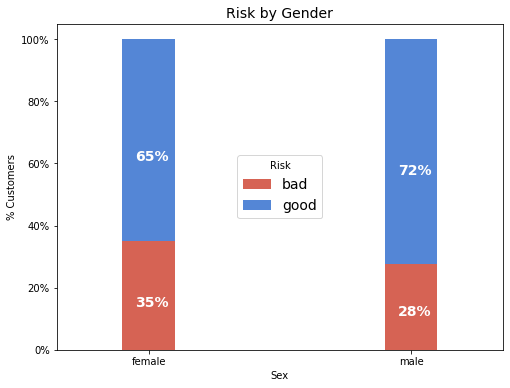

In [19]:
import matplotlib.ticker as mtick
colors = ['#d66354','#5486d6']
gender_risk = df.groupby(['Sex','Risk']).size().unstack()

ax = (gender_risk.T*100.0 / gender_risk.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Risk')
ax.set_ylabel('% Customers')
ax.set_title('Risk by Gender',size = 14)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

- The plot shows number of people categorized by their gender and risk type.
- For both genders, most number of people have good risk.
- 72% males have good risk which is higher than females.

Text(0.5, 1.0, 'Risk = Bad')

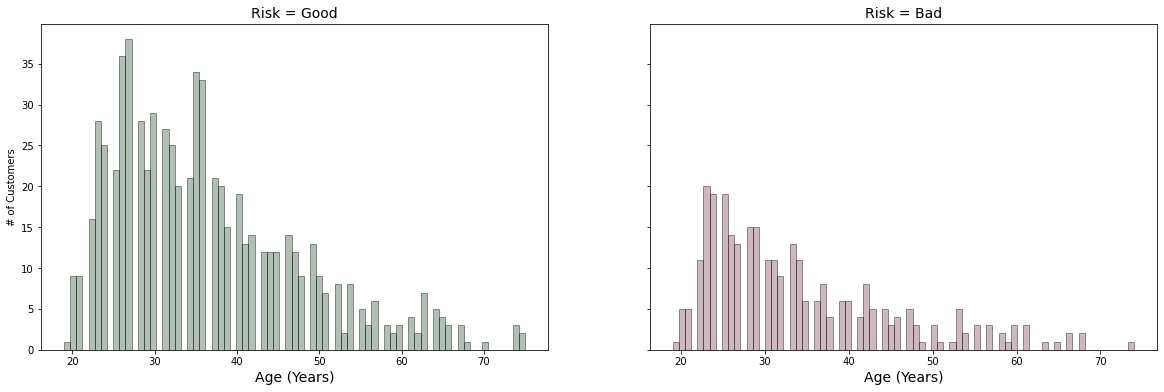

In [21]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Risk']=='good']['Age'],
                   hist=True, kde=False,
                   bins=75, color = '#3a6347',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age (Years)',size = 14)
ax.set_title('Risk = Good',size = 14)

ax = sns.distplot(df[df['Risk']=='bad']['Age'],
                   hist=True, kde=False,
                   bins=75, color = '#854d65',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Age (Years)',size = 14)
ax.set_title('Risk = Bad',size = 14)

- The output above displays number of people by their age for both risk types.
- As usual, the distribution shows greater number of people with good risk however the shape of distribution for both risk types is quite similar, both have positively skewed distribution.
- Most people who have good risk have age of 26 years and most people who have bad risk have age of 23 years.

Text(0.5, 1.0, 'Age by Job')

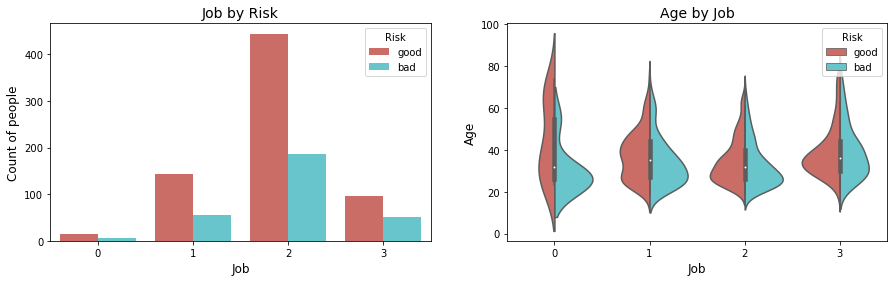

In [23]:
plt.figure(figsize = (15,4))
ax = plt.subplot(121)
ax = sns.countplot(x="Job", data=df, 
              palette="hls", hue="Risk")
ax.set_xlabel("Job", fontsize=12)
ax.set_ylabel("Count of people", fontsize=12)
ax.set_title("Job by Risk", fontsize=14)

ax1 = plt.subplot(122)
ax1 = sns.violinplot(x="Job", y="Age", data=df, palette="hls", hue = "Risk",split=True)
ax1.set_xlabel("Job", fontsize=12)
ax1.set_ylabel("Age", fontsize=12)
ax1.set_title("Age by Job", fontsize=14)

 Few points to observe from these plots:
 - For all job types, most people have good risk.
 - Job type 2 shows highest number of people and the age distribution for job type 2 is less spread compared to other job types. 
 - Job type 0 shows lowest number of people and the age distribution for job type 0 shows most people with age of 19 to 40 years having higher bad risk. Age distribution is most spread in job type 0 with good risk.

Text(0.5, 1.0, 'Distribution of credit amount by Risk')

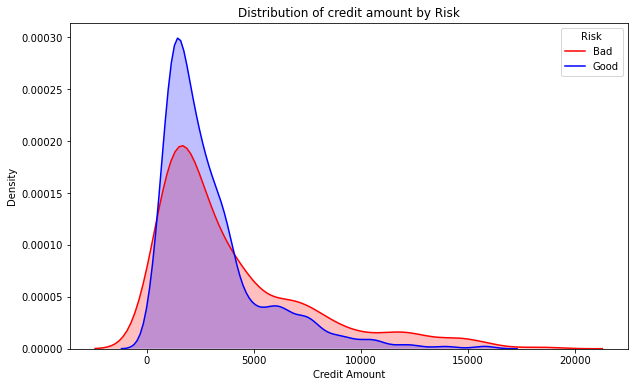

In [24]:
figure(figsize=(10,6))
ax = sns.kdeplot(df['Credit amount'][(df["Risk"] == 'bad') ],
                color="Red", shade = True)
ax = sns.kdeplot(df['Credit amount'][(df["Risk"] == 'good') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Bad","Good"],loc='upper right',title = 'Risk')
ax.set_ylabel('Density')
ax.set_xlabel('Credit Amount')
ax.set_title('Distribution of credit amount by Risk')

- The display above shows distribution of credit amount for each risk type.
- For each risk type, distribution is positively skewed.
- Credit amount distribution with good risk has higher peak than bad risk.
- It seems that there is higer good risk when the credit amount is lower.

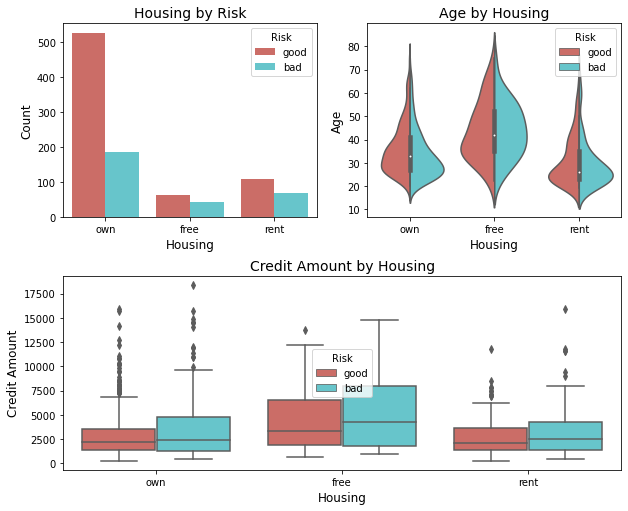

In [25]:
plt.figure(figsize = (10,8))

ax = plt.subplot(221)
ax = sns.countplot(x="Housing", data=df, 
              palette="hls", hue="Risk")
ax.set_xlabel("Housing", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Housing by Risk", fontsize=14)

ax1 = plt.subplot(222)
ax1 = sns.violinplot(x="Housing", y="Age", data=df, palette="hls", hue = "Risk",split=True)
ax1.set_xlabel("Housing", fontsize=12)
ax1.set_ylabel("Age", fontsize=12)
ax1.set_title("Age by Housing", fontsize=14)

ax2 = plt.subplot(212)
ax2 = sns.boxplot(x="Housing",y="Credit amount", data=df,hue='Risk',palette="hls")
ax2.set_xlabel("Housing", fontsize=12)
ax2.set_ylabel("Credit Amount", fontsize=12)
ax2.set_title("Credit Amount by Housing", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

- Most people who have own housing have high good risk but there credit amount is not much high similar to people who are renting house with age peaking at 30 years.
- People who have free housing shows lowest good risk among housing types risk but higher credit amount, and their age distribution is most dense.
- It seems that there is higer good risk when the age is lower for all housing types.
- People who have free housing have high credit amounts which can be understood as they dont have to spent for housing.
- The proportion of bad risk is higher in terms of credit amount for all housing types.
- There seems a correlation between housing and credit amount.

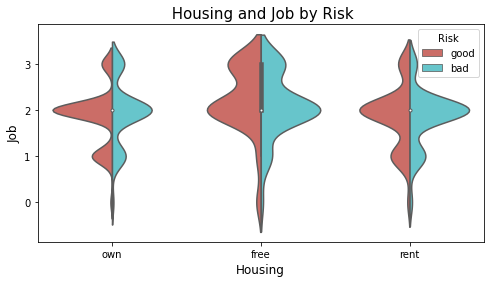

In [26]:
plt.figure(figsize = (8,4))

ax = sns.violinplot(x="Housing",y="Job",data=df,
                   hue="Risk", palette="hls",split=True)
ax.set_xlabel("Housing", fontsize=12)
ax.set_ylabel("Job", fontsize=12)
ax.set_title(" Housing and Job by Risk", fontsize=15)

plt.show()

- Most people who have free housing work the most as the distribution is dense.
- For all cases, people mostly have job type 2.
- People with job type 2 have higher good risk.
- People who have own housing seems less employed as the distribution is not much dense.

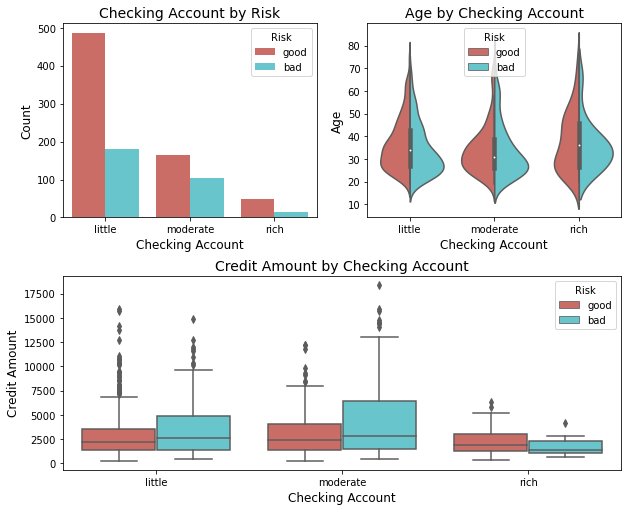

In [18]:
plt.figure(figsize = (10,8))

ax = plt.subplot(221)
ax = sns.countplot(x="Checking account", data=df, 
              palette="hls", hue="Risk")
ax.set_xlabel("Checking Account", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Checking Account by Risk", fontsize=14)

ax1 = plt.subplot(222)
ax1 = sns.violinplot(x="Checking account", y="Age", data=df, palette="hls", hue = "Risk",split=True)
ax1.set_xlabel("Checking Account", fontsize=12)
ax1.set_ylabel("Age", fontsize=12)
ax1.set_title("Age by Checking Account", fontsize=14)

ax2 = plt.subplot(212)
ax2 = sns.boxplot(x="Checking account",y="Credit amount", data=df,hue='Risk',palette="hls")
ax2.set_xlabel("Checking Account", fontsize=12)
ax2.set_ylabel("Credit Amount", fontsize=12)
ax2.set_title("Credit Amount by Checking Account", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

- Most people who have little checking account have higher good risk than other checking account types but the credit amount is not much high.
- People who have rich checking account have the least credit amount and have most dense age distribution.
- People who have moderate checking account have higher credit amount.
- In terms of credit amount, the proportion of bad risk is higher in little and moderate checking accounts and lower in rich checking accounts compared to good risk.
- It seems that there is higer good risk when the age is lower for all checking accounts types.
- There seems no correlation between checking accounts and credit amount.

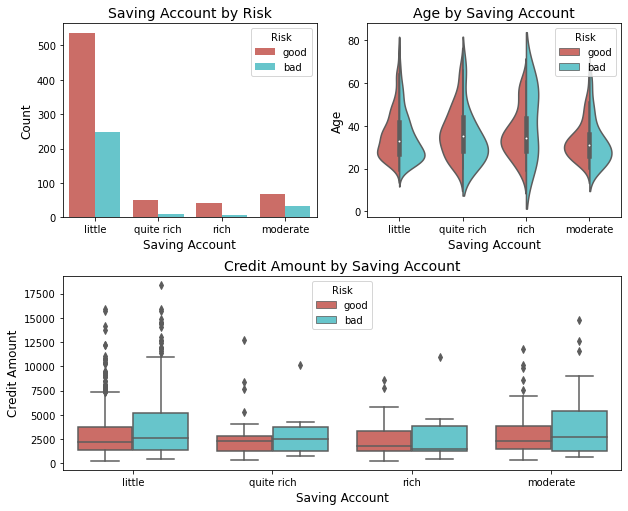

In [19]:
plt.figure(figsize = (10,8))

ax = plt.subplot(221)
ax = sns.countplot(x="Saving accounts", data=df, 
              palette="hls", hue="Risk")
ax.set_xlabel("Saving Account", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Saving Account by Risk", fontsize=14)

ax1 = plt.subplot(222)
ax1 = sns.violinplot(x="Saving accounts", y="Age", data=df, palette="hls", hue = "Risk",split=True)
ax1.set_xlabel("Saving Account", fontsize=12)
ax1.set_ylabel("Age", fontsize=12)
ax1.set_title("Age by Saving Account", fontsize=14)

ax2 = plt.subplot(212)
ax2 = sns.boxplot(x="Saving accounts",y="Credit amount", data=df,hue='Risk',palette="hls")
ax2.set_xlabel("Saving Account", fontsize=12)
ax2.set_ylabel("Credit Amount", fontsize=12)
ax2.set_title("Credit Amount by Saving Account", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

- Most people who have little saving account have higher good risk than other checking account types and the credit amount is also high similar to moderate saving account.
- People who have quite rich saving account have the least credit amount and have most dense age distribution.
- In terms of credit amount, the proportion of bad risk is higher in all types of saving accounts compared to good risk.
- It seems that there is higer good risk when the age is lower for all saving accounts types.
- There seems less correlation between saving accounts and credit amount.

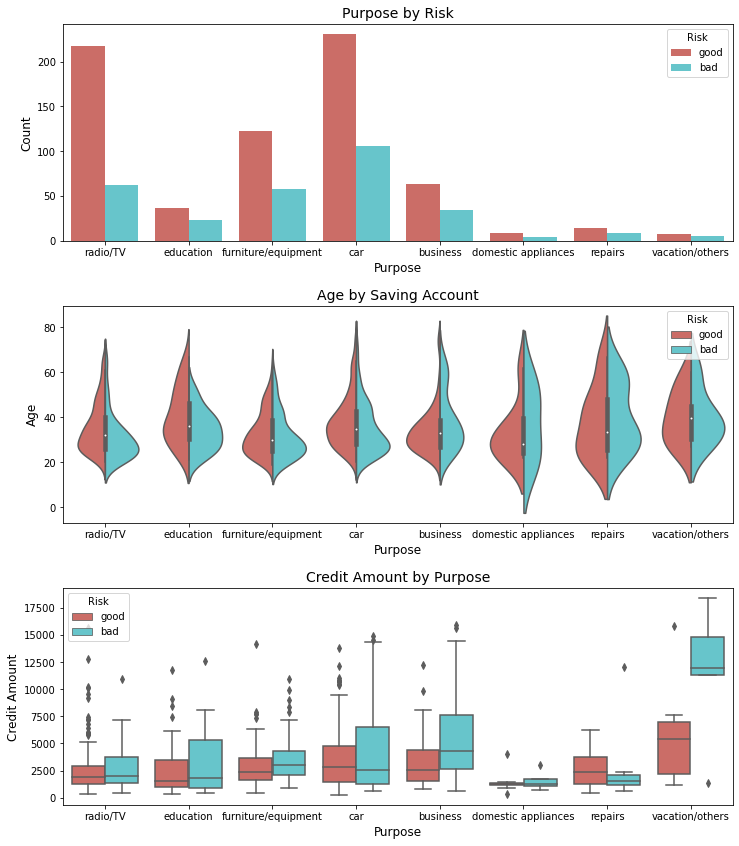

In [20]:
plt.figure(figsize=(12, 14))

plt.subplot(3,1,1)
ax = sns.countplot(x="Purpose", data=df, 
              palette="hls", hue="Risk")
ax.set_xlabel("Purpose", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Purpose by Risk", fontsize=14)

plt.subplot(3,1,2)
ax1 = sns.violinplot(x="Purpose", y="Age", data=df, palette="hls", hue = "Risk", split=True)
ax1.set_xlabel("Purpose", fontsize=12)
ax1.set_ylabel("Age", fontsize=12)
ax1.set_title("Age by Saving Account", fontsize=14)

plt.subplot(3,1,3)
ax2 = sns.boxplot(x="Purpose",y="Credit amount", data=df,hue='Risk',palette="hls")
ax2.set_xlabel("Purpose", fontsize=12)
ax2.set_ylabel("Credit Amount", fontsize=12)
ax2.set_title("Credit Amount by Purpose", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

- People whose purpose is to purchase car have higher good risk than other purpose types followed by radio/TV.
- Domestic appliances purpose shows the least credit amount. 
- Mostly, the proportion of bad risk is higher in all types of purposes compared to good risk in terms of credit amount.
- It seems that there is higer good risk when the age is lower for all puposes.
- For vacation/others purpose, there is a significant difference between good risk and bad risk in terms of credit amount.
- Though, the number of people having car purpose is much high than number of people having vacation purposes, the credit amount is much lower for car purpose compared to vacation/other purpose.
- Purpose and credit amount does not seem much correlated.

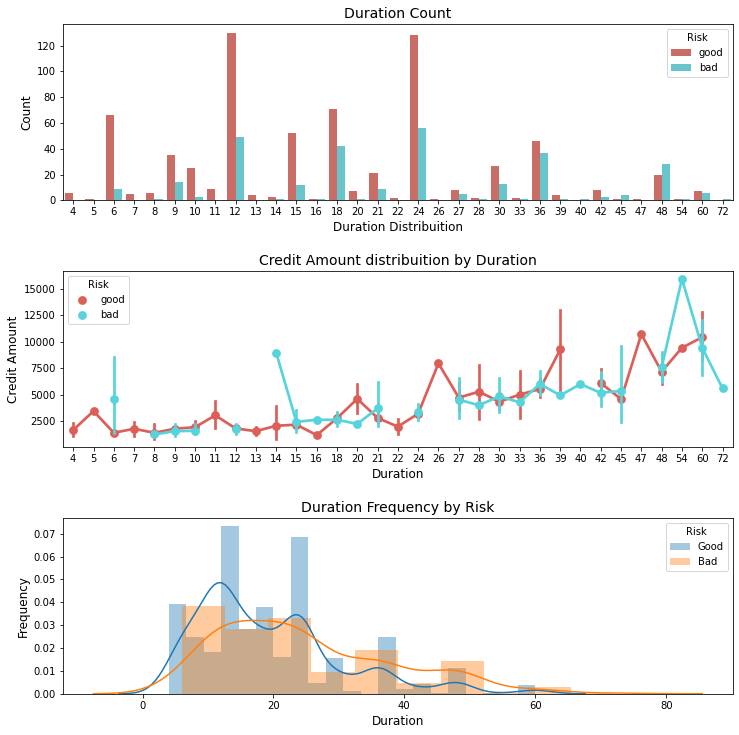

In [21]:
plt.figure(figsize=(12, 12))

ax= plt.subplot(311)
ax = sns.countplot(x="Duration", data=df, 
              palette="hls",  hue = "Risk")
ax.set_xlabel("Duration Distribuition", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Duration Count", fontsize=14)

ax1 = plt.subplot(312)
ax1 = sns.pointplot(x="Duration", y ="Credit amount",data=df,
                   hue="Risk", palette="hls")
ax1.set_xlabel("Duration", fontsize=12)
ax1.set_ylabel("Credit Amount", fontsize=12)
ax1.set_title("Credit Amount distribuition by Duration", fontsize=14)

ax2 = plt.subplot(313)
ax2 = sns.distplot(df[df['Risk']=='good']["Duration"])
ax2 = sns.distplot(df[df['Risk']=='bad']["Duration"])
ax2.set_xlabel("Duration", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.legend(["Good","Bad"],loc='upper right',title = 'Risk')
ax2.set_title("Duration Frequency by Risk", fontsize=14)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

- Most number of people having 12 months credit duration have higher good risk followed by 24 month duration.
- Credit amount tends to increase with increase in credit duration.
- It seems that there is higer good risk when the credit duration is lower.
- There seems a good correlation between credit duration and credit amount.

#### - Dealing with outliers

From data visualisation, outliers were detected that can affect model performances, so in this section, I will detect and remove outliers by using z score method.

In [22]:
df.shape

(1000, 10)

Initially, there are 1000 records in the data containing outliers.

In [23]:
from scipy import stats

num_col = [feature for feature in df.columns if df[feature].dtypes!='O']
data = df[num_col]

z=np.abs(stats.zscore(data))
filtered_entries = (z < 3).all(axis=1)
df1 = df[filtered_entries]
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [24]:
df1.shape

(958, 10)

42 records were detected as outliers, so after removing them, the data contains 958 records.

### 2. Finding correlated variables

In this section, I will use Random Forest and Pearson Correlation method to find feature importance.

#### i) Embeded Method (Random Forest)

In [25]:
# Dataset for Random Forest test

df2 = df1.copy()
df2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [26]:
# Loading libraries for Random Forest test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ordinal_list=['Saving accounts','Checking account']
df2['Saving accounts'] = df2['Saving accounts'].replace(['little','moderate','rich','quite rich'],[1,2,3,4])
df2['Checking account'] = df2['Checking account'].replace(['little','moderate','rich'],[1,2,3])

# Excluding target variable
data=df2.drop(['Risk'],axis=1)

# Creating an array of all nominal features
nominal_list = []
for i in data.columns.tolist():
    if (data[i].dtype=='object') and (i not in ordinal_list):
        nominal_list.append(i)
        
# label encoding for all nominal features
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in nominal_list:
    data[column]=encoder.fit_transform(data[column])
    
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,1,1,1169,6,5
1,22,0,2,1,1,2,5951,48,5
2,49,1,1,1,1,1,2096,12,3
3,45,1,2,0,1,1,7882,42,4
4,53,1,2,0,1,1,4870,24,1


In [27]:
# Labelling X and y for the test
X=data
y=df2['Risk']

# Creating X_train & Y_train labels
X_train=data
Y_train=y

# Preprocessing Y-train data into integer type
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

# Defining Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,training_scores_encoded)

importances = clf.feature_importances_

#Sorting 
sorted_feature_importance = sorted(zip(importances, list(X_train)),
reverse=True)

feature_imp2 = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

[Text(0.5, 0, 'Feature Importance')]

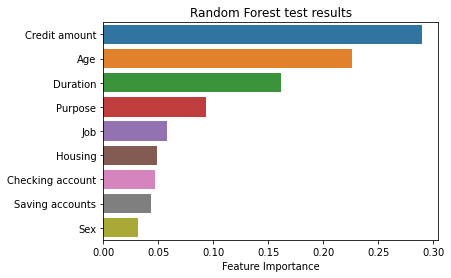

In [28]:
ax=sns.barplot(x=feature_imp2, y=feature_imp2.index)
ax.set_title('Random Forest test results')
ax.set(xlabel='Feature Importance')

- According to Random Forest test results, credit amount, Age and Duration are most correlated with Risk Type.
- Interstingly, Checking account and saving accounts shows less correlation with Risk Type.


Lets identify important variables from Pearson Correlation Method.

#### ii) Pearson Correlation Method

In [29]:
#Converting the predictor variable in a binary numeric variable
df1['Risk'] = df1['Risk'].replace(['good','bad'],[1,0])

# Converting all the categorical variables into dummy variables
dummies = pd.get_dummies(df1)
df_dummies = dummies.select_dtypes(exclude=['object'])
df_dummies.head()

<ipython-input-29-f84b1823d641>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Risk'] = df1['Risk'].replace(['good','bad'],[1,0])


,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Text(0, 0.5, 'Feature Importance')

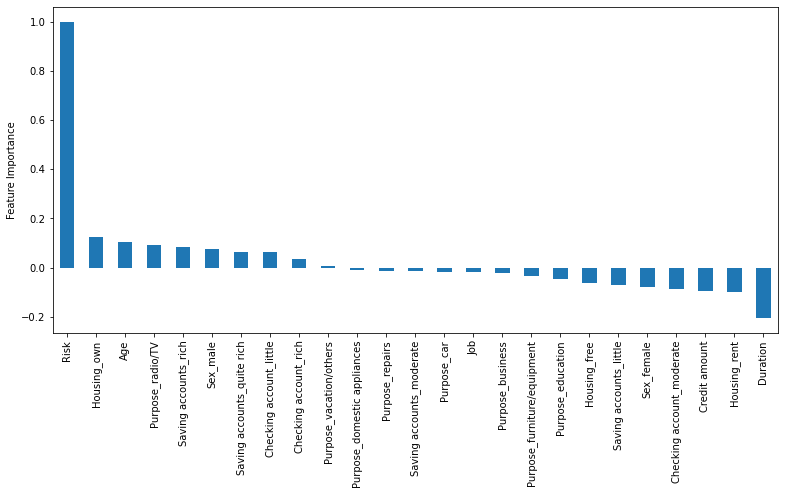

In [30]:
#Get Correlation of "Risk" with other variables:
plt.figure(figsize=(13,6))
df_dummies.corr()['Risk'].sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Feature Importance')

- Own housing, Age and purpose of radio/TV seem to be positively correlated with Risk type. While, rent housing and duration seem to be negatively correlated with risk type.
- Interstingly, credit amount shows less correlation with Risk Type in contrast to Random forest results..

### 3. Implementation of Classification Algorithms

In this section, I will implement all the classification algorithms studied in class and plot learning curves, confusion matrix and ROC curves for each algorithm. Finally I will assess accuracies, F1 Scores, Precision and recall, to suggest the best possible classification algorithm.

In [31]:
### Split dataset into Train & Test Data ###

# Specifying X and y
y = df_dummies['Risk'].values
X = df_dummies.drop(columns = ['Risk'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("xtrain shape : ", X_train.shape)          # 70% of data is used in X_train
print("xtest shape  : ", X_test.shape)           # 30% of data is used in X_test
print("ytrain shape : ", y_train.shape)          # 70% of target is used in y_train
print("ytest shape  : ", y_test.shape)           # 30% of target is used in y_test

xtrain shape :  (670, 24)
xtest shape  :  (288, 24)
ytrain shape :  (670,)
ytest shape  :  (288,)


#### i) Logistic Regression Algorithm

In [32]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
result = lrmodel.fit(X_train, y_train); 

In [33]:
from sklearn import metrics                                                              
from sklearn.metrics import roc_curve                               
from sklearn.metrics import roc_auc_score                       
                                                                
ypredlr = lrmodel.predict(X_test)                             
                                 
acc_lr = metrics.accuracy_score(y_test, ypredlr)                                                         
prec_lr = metrics.precision_score(y_test, ypredlr)           
rec_lr = metrics.recall_score(y_test, ypredlr)               
f1_lr = metrics.f1_score(y_test, ypredlr) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredlr)
classification = metrics.classification_report(y_test, ypredlr)
lr_fpr , lr_tpr, _ = roc_curve(y_test, ypredlr)
auc_lr = metrics.auc(lr_fpr, lr_tpr)
print()
print('========================= Logistic Regression Model Evaluation =========================')
print()
print ("Model Accuracy:" "\n", acc_lr)
print()
print("AUC:" "\n", auc_lr)
print()
print("Classification report:" "\n", classification) 
print()                 


========================= Logistic Regression Model Evaluation =========================

Model Accuracy:
 0.7152777777777778

AUC:
 0.5450334534225425

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.11      0.20        87
           1       0.72      0.98      0.83       201

    accuracy                           0.72       288
   macro avg       0.69      0.55      0.51       288
weighted avg       0.70      0.72      0.64       288




- From classification report, it can be observed that recall rate and f1 score for class label 0 is only 0.11 and 0.20 respectively but recall rate and f1 score for class label 1 is 0.98 and 0.83 respectively. That means for class label 0, very few True positives are selected from relevant labels compared to class label 1. It means that the dataset has class imbalance problem and is biased towards class label 1. Also both class labels are relevant so classification should not be biased.
- Though the model accuracy is 0.715, this score becomes irrelevant due to imbalanced data and accuracy does not adequately represent models performance.

##### - Confusion Matrix Plot for Logistic Regression Model

Text(0.5, 1.0, 'Logistic Regression Model')

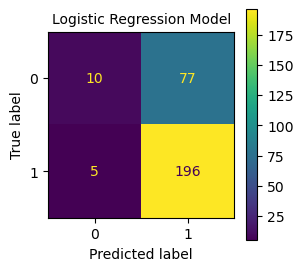

In [34]:
from sklearn.metrics import plot_confusion_matrix

plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(lrmodel, X_test, y_test, ax=ax)
plt.title('Logistic Regression Model',fontsize = 10)

There are two possible predicted classes.
- The classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 273 times, and negatives 15 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for Logistic Regression Model

Text(0.5, 0, 'False Positive Rate')

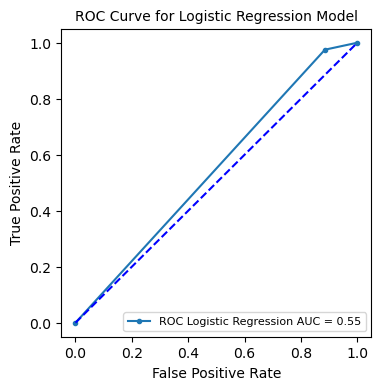

In [35]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'ROC Logistic Regression AUC = %0.2f' % auc_lr)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for Logistic Regression Model', fontsize = 10)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

- When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.
- It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than 0.5 but much lower than 1 (0.55)

##### - Learning Curve for Logistic Regression Model

In [36]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = lrmodel,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

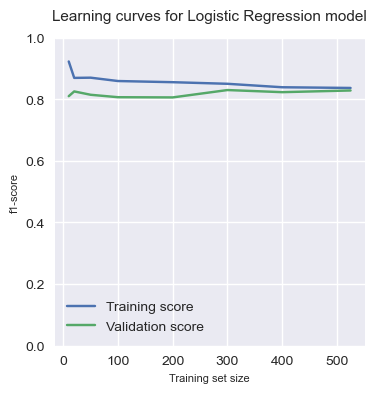

In [37]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for Logistic Regression model', fontsize = 11, y = 1.03)
plt.legend()
plt.ylim(0,1)

Learning curve shows how model score changes as the training set size increases. I chose f1 score as the model score to evaluate the learning curve.

- From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve converges.
- Smaller the gap, the better the model generalizes.
- Adding more data is less likely to help.
- Training score decreases and straightens indicating bias case.

#### ii) KNN Algorithm

In [38]:
# Running KNN model
from sklearn.neighbors import KNeighborsClassifier
modelk = KNeighborsClassifier(n_jobs=-1)
result = modelk.fit(X_train, y_train); 

In [39]:
ypredk = modelk.predict(X_test)

# Print the prediction accuracy
acc_knn = metrics.accuracy_score(y_test, ypredk)
prec_knn = metrics.precision_score(y_test, ypredk)
rec_knn = metrics.recall_score(y_test, ypredk)
f1_knn = metrics.f1_score(y_test, ypredk) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredk)
classification = metrics.classification_report(y_test, ypredk)
knn_fpr , knn_tpr, _ = roc_curve(y_test, ypredk)
auc_knn = metrics.auc(knn_fpr, knn_tpr)
print()
print('============================== KNN Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_knn)
print()
print("AUC:" "\n", auc_knn)
print()
print("Classification report:" "\n", classification) 
print()


============================== KNN Model Evaluation ==============================

Model Accuracy:
 0.6840277777777778

AUC:
 0.548721907702865

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.21      0.28        87
           1       0.72      0.89      0.80       201

    accuracy                           0.68       288
   macro avg       0.59      0.55      0.54       288
weighted avg       0.64      0.68      0.64       288




From classification report, it can be observed that precision, recall rate and f1 score for class label 0 is only 0.45, 0.21 and 0.28 respectively but precision, recall rate and f1 score for class label 1 is 0.72, 0.89 and 0.80 respectively. It indicates class imbalance problem.

##### - Confusion Matrix Plot for KNN Model

Text(0.5, 1.0, 'KNN Model')

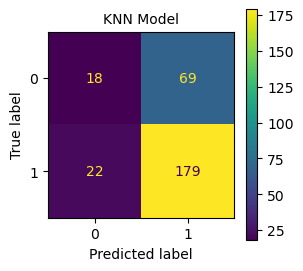

In [40]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelk, X_test, y_test, ax=ax)
plt.title('KNN Model',fontsize = 10)

- The classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 248 times, and negatives 40 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for KNN Model

Text(0.5, 0, 'False Positive Rate')

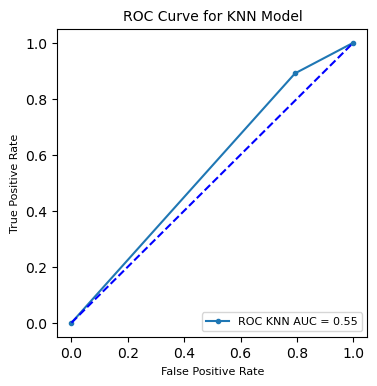

In [41]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(knn_fpr, knn_tpr, marker='.', label = 'ROC KNN AUC = %0.2f' % auc_knn)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for KNN Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

- It is evident from the plot that the AUC for the KNN ROC curve is higher than 0.5 but much lower than 1 (0.55)

##### - Learning Curve for KNN Model

In [42]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelk,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

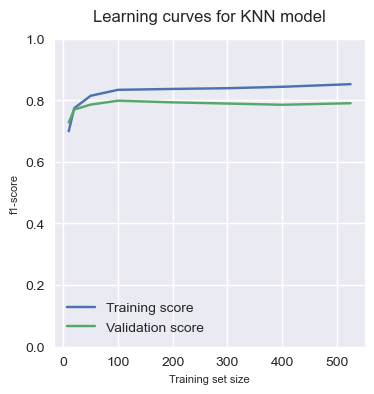

In [43]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for KNN model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve slightly diverges.
- Adding more training set will only increase the gap between the curves.
- Validation score becomes straight indicating that the model is unable to learn with increasing training size.
- The learning crve shows high bias and underfitting.

#### iii) Decision Tree Algorithm

In [44]:
# Running decision tree model
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier()
result = dtmodel.fit(X_train, y_train);

In [45]:
ypreddt = dtmodel.predict(X_test)

# Print the prediction accuracy
acc_dt = metrics.accuracy_score(y_test, ypreddt)
prec_dt = metrics.precision_score(y_test, ypreddt)
rec_dt = metrics.recall_score(y_test, ypreddt)
f1_dt = metrics.f1_score(y_test, ypreddt) 
confusion_matrix = metrics.confusion_matrix(y_test, ypreddt)
classification = metrics.classification_report(y_test, ypreddt)
dt_fpr , dt_tpr, _ = roc_curve(y_test, ypreddt)
auc_dt = metrics.auc(dt_fpr, dt_tpr)
print()
print('============================== Decision Tree Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_dt)
print()
print("AUC:" "\n", auc_dt)
print()
print("Classification report:" "\n", classification) 
print()


============================== Decision Tree Model Evaluation ==============================

Model Accuracy:
 0.6770833333333334

AUC:
 0.5958998112883857

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.39      0.42        87
           1       0.75      0.80      0.78       201

    accuracy                           0.68       288
   macro avg       0.61      0.60      0.60       288
weighted avg       0.66      0.68      0.67       288




Classification report shows class imbalance as class label 0 has much lower precision, recall score and f1 score than class label 1. 

##### - Confusion Matrix Plot for Decision Tree Model

Text(0.5, 1.0, 'Decision Tree Model')

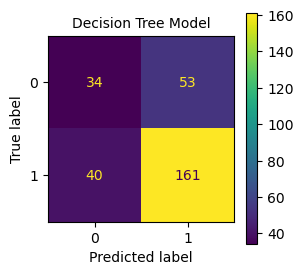

In [46]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(dtmodel, X_test, y_test, ax=ax)
plt.title('Decision Tree Model',fontsize = 10)

- Decision tree classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 214 times, and negatives 74 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for Decision Tree Model

Text(0.5, 0, 'False Positive Rate')

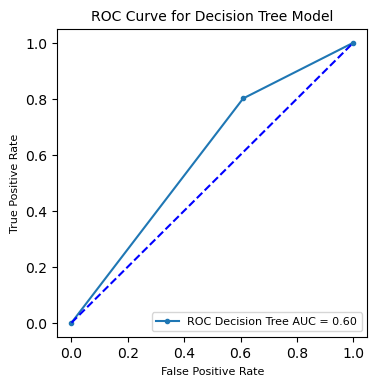

In [47]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(dt_fpr, dt_tpr, marker='.', label = 'ROC Decision Tree AUC = %0.2f' % auc_dt)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for Decision Tree Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

It can be seen from the plot that the AUC for the Decision Tree ROC curve is higher than 0.5 but much lower than 1 (0.55) better than Logistic Regression and KNN classifiers.

##### - Learning Curve for Decision Tree Model

In [48]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = dtmodel,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

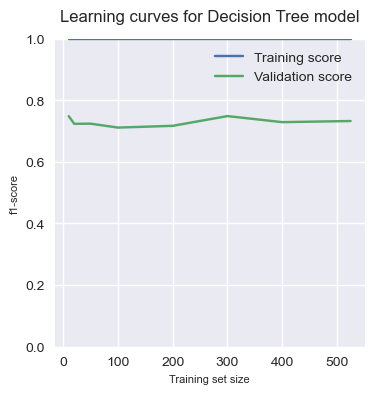

In [49]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for Decision Tree model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- Training score curve is at its maximum regardless of training examples indicating severe overfitting.
- Validation score increases then becomes straight over time.
- Huge gap between validation score and training score indicates high variance scenario
- Reducing complexity of the model or gathering more data may yield better results.

#### iv) Naive Bayes Algorithm

In [50]:
# Running bernoulli NB model
from sklearn.naive_bayes import BernoulliNB 
modelb = BernoulliNB()
result = modelb.fit(X_train, y_train); 

In [51]:
from sklearn import metrics

ypredb = modelb.predict(X_test)

# Print the prediction accuracy
acc_nb = metrics.accuracy_score(y_test, ypredb)
prec_nb = metrics.precision_score(y_test, ypredb)
rec_nb = metrics.recall_score(y_test, ypredb)
f1_nb = metrics.f1_score(y_test, ypredb) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredb)
classification = metrics.classification_report(y_test, ypredb)
nb_fpr , nb_tpr, _ = roc_curve(y_test, ypredb)
auc_nb = metrics.auc(nb_fpr, nb_tpr)
print()
print('============================== Naive Bayes Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_nb)
print()
print("AUC:" "\n", auc_nb)
print()
print("Classification report:" "\n", classification) 
print()


============================== Naive Bayes Model Evaluation ==============================

Model Accuracy:
 0.6770833333333334

AUC:
 0.5437467833247555

Classification report:
               precision    recall  f1-score   support

           0       0.43      0.21      0.28        87
           1       0.72      0.88      0.79       201

    accuracy                           0.68       288
   macro avg       0.57      0.54      0.54       288
weighted avg       0.63      0.68      0.64       288




The classification report shows class imbalance as the difference between model scores for class label 0 and 1 is huge. 

##### - Confusion Matrix Plot for Naive Bayes Model

Text(0.5, 1.0, 'Naive Bayes Model')

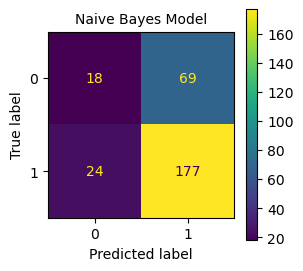

In [52]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelb, X_test, y_test, ax=ax)
plt.title('Naive Bayes Model',fontsize = 10)

- Naive Bayes classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 246 times, and negatives 42 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for Naive Bayes Model

Text(0.5, 0, 'False Positive Rate')

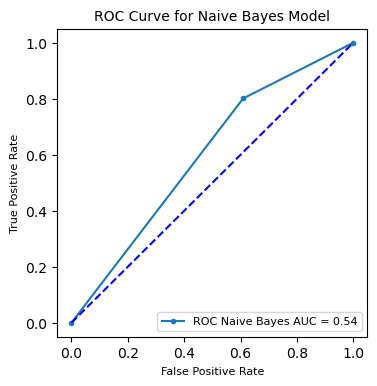

In [53]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(dt_fpr, dt_tpr, marker='.', label = 'ROC Naive Bayes AUC = %0.2f' % auc_nb)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for Naive Bayes Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

The ROC curve for Naive bayes classifier shows that it performs better than no skill but is far from ideal scenario.

##### - Learning Curve for Naive Bayes Model

In [54]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelb,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

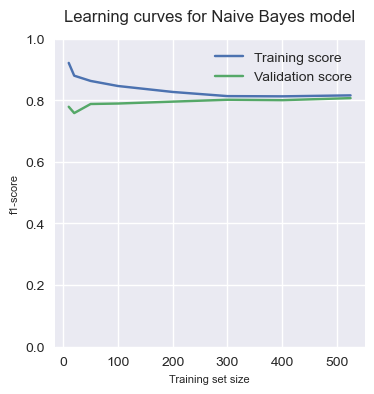

In [55]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for Naive Bayes model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- It is evident from the plot that by increasing the training size, training score decreases and validation score curve increases and converges until the gap becomes between the curves becomes constant.
- Adding more training data wont help thus indicating bias scenario.

#### v) Support Vecor Machine (SVM) 

In [56]:
from sklearn.svm import SVC
modelsv = SVC(kernel='poly', degree=8)
result = modelsv.fit(X_train, y_train);

In [57]:
ypredsv = modelsv.predict(X_test)

# Print the prediction accuracy
acc_sv = metrics.accuracy_score(y_test, ypredsv)
prec_sv = metrics.precision_score(y_test, ypredsv)
rec_sv = metrics.recall_score(y_test, ypredsv)
f1_sv = metrics.f1_score(y_test, ypredsv) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredsv)
classification = metrics.classification_report(y_test, ypredsv)
sv_fpr , sv_tpr, _ = roc_curve(y_test, ypredsv)
auc_sv = metrics.auc(sv_fpr, sv_tpr)
print()
print('============================== SVM Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_sv)
print()
print("AUC:" "\n", auc_sv)
print()
print("Classification report:" "\n", classification) 
print()


============================== SVM Model Evaluation ==============================

Model Accuracy:
 0.6493055555555556

AUC:
 0.5303654143077715

Classification report:
               precision    recall  f1-score   support

           0       0.37      0.23      0.28        87
           1       0.71      0.83      0.77       201

    accuracy                           0.65       288
   macro avg       0.54      0.53      0.53       288
weighted avg       0.61      0.65      0.62       288




From classification report, it is understood that there is a class imbalance and the classifier shows biased results towards class label 1.

##### - Confusion Matrix Plot for SVM Model

Text(0.5, 1.0, 'SVM Model')

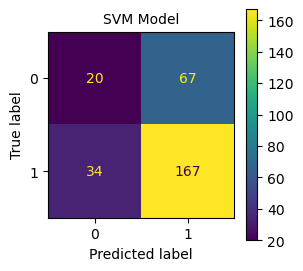

In [58]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelsv, X_test, y_test, ax=ax)
plt.title('SVM Model',fontsize = 10)

- SVM classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 234 times, and negatives 54 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for SVM Model

Text(0.5, 0, 'False Positive Rate')

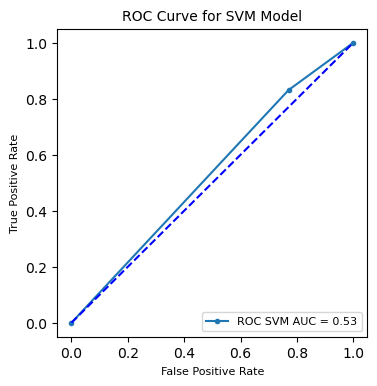

In [59]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(sv_fpr, sv_tpr, marker='.', label = 'ROC SVM AUC = %0.2f' % auc_sv)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for SVM Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

The ROC curve for SVM classifier is too close to the no skill line indicating less efficient performance.

##### - Learning Curve for SVM Model

In [60]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelsv,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


(0.0, 1.0)

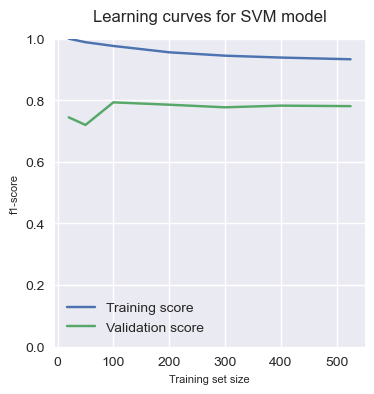

In [61]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for SVM model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- It is evident from the plot that by increasing the training set size, training score curve decreases in a very slow rate and validation curve increases then becomes straight.
- A huge gap between the curves indicates high variance scenario.

### Ensemble Methods

#### i) Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(n_estimators=200)
result = modelrf.fit(X_train, y_train) 

In [63]:
ypredrf = modelrf.predict(X_test)

# Print the prediction accuracy
acc_rf = metrics.accuracy_score(y_test, ypredrf)
prec_rf = metrics.precision_score(y_test, ypredrf)
rec_rf = metrics.recall_score(y_test, ypredrf)
f1_rf = metrics.f1_score(y_test, ypredrf) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredrf)
classification = metrics.classification_report(y_test, ypredrf)
rf_fpr , rf_tpr, _ = roc_curve(y_test, ypredrf)
auc_rf = metrics.auc(rf_fpr, rf_tpr)
print()
print('============================== Random Forest Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_rf)
print()
print("AUC:" "\n", auc_rf)
print()
print("Classification report:" "\n", classification) 
print()


============================== Random Forest Model Evaluation ==============================

Model Accuracy:
 0.6840277777777778

AUC:
 0.5454623434551381

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.20      0.27        87
           1       0.72      0.90      0.80       201

    accuracy                           0.68       288
   macro avg       0.58      0.55      0.54       288
weighted avg       0.64      0.68      0.64       288




Classification report shows class imbalance as class label 0 has much lower precision, recall score and f1 score than class label 1.

##### - Confusion Matrix Plot for Random Forest Model

Text(0.5, 1.0, 'Random Forest Model')

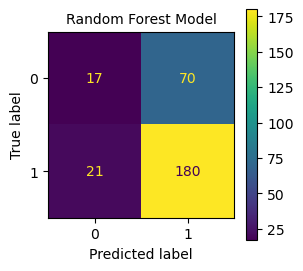

In [64]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelrf, X_test, y_test, ax=ax)
plt.title('Random Forest Model',fontsize = 10)

- Random Forest classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 250 times, and negatives 38 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for Random Forest Model

Text(0.5, 0, 'False Positive Rate')

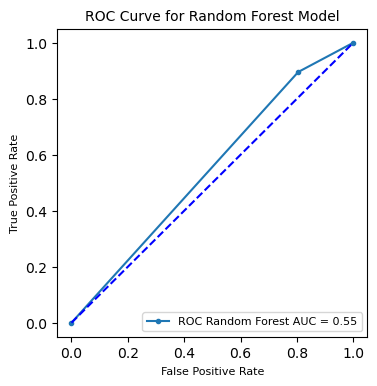

In [65]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(rf_fpr, rf_tpr, marker='.', label = 'ROC Random Forest AUC = %0.2f' % auc_rf)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for Random Forest Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

- It is evident from the plot that the AUC for the Random Forest ROC curve is higher than 0.5 but much lower than 1 (0.55)

##### - Learning Curve for Random Forest Model

In [66]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

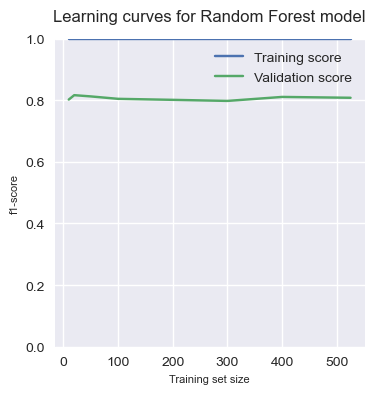

In [67]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for Random Forest model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- Training score curve is at its maximum regardless of training examples indicating severe overfitting.
- Validation score increases then becomes straight over time.
- Huge gap between validation score and training score indicates high variance scenario
- Reducing complexity of the model or gathering more data may yield better results.

#### ii) AdaBoost Classifier

In [68]:
from sklearn.ensemble import  AdaBoostClassifier
modelad = AdaBoostClassifier()
result = modelad.fit(X_train, y_train);

In [69]:
ypredad = modelad.predict(X_test)

acc_ad = metrics.accuracy_score(y_test, ypredad)
prec_ad = metrics.precision_score(y_test, ypredad)
rec_ad = metrics.recall_score(y_test, ypredad)
f1_ad = metrics.f1_score(y_test, ypredad) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredad)
classification = metrics.classification_report(y_test, ypredad)
ad_fpr , ad_tpr, _ = roc_curve(y_test, ypredad)
auc_ad = metrics.auc(ad_fpr, ad_tpr)
print()
print('============================== AdaBoost Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_ad)
print()
print("AUC:" "\n", auc_ad)
print()
print("Classification report:" "\n", classification) 
print()


============================== AdaBoost Model Evaluation ==============================

Model Accuracy:
 0.71875

AUC:
 0.5833762223365929

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.24      0.34        87
           1       0.74      0.93      0.82       201

    accuracy                           0.72       288
   macro avg       0.66      0.58      0.58       288
weighted avg       0.69      0.72      0.68       288




- Class Imbalance, the classifier gives biased results towards class label 1 thus accuracy score may not be an adequate performance score.

##### - Confusion Matrix Plot for AdaBoost Model

Text(0.5, 1.0, 'AdaBoost Model')

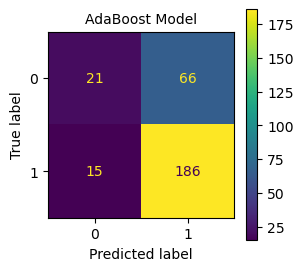

In [70]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelad, X_test, y_test, ax=ax)
plt.title('AdaBoost Model',fontsize = 10)

- AdaBoost classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 252 times, and negatives 36 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for AdaBoost Model

Text(0.5, 0, 'False Positive Rate')

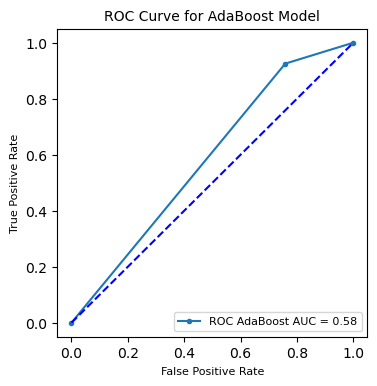

In [71]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(ad_fpr, ad_tpr, marker='.', label = 'ROC AdaBoost AUC = %0.2f' % auc_ad)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for AdaBoost Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

The ROC curve for AdaBoost classifier shows better AUC score than the classifiers before.

##### - Learning Curve for AdaBoost Model

In [72]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelad,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

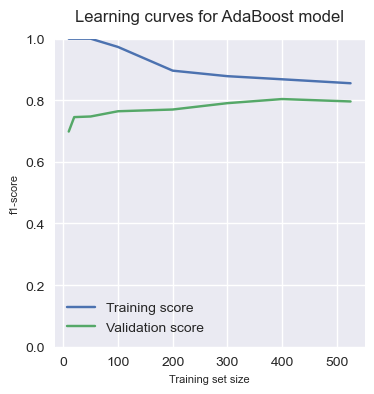

In [73]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for AdaBoost model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- It is observed from the plot that training score decreases and validation score increases until the curves converges with slow rate.
- Adding more training data may help.
- Huge gap between the curves indicates high variance case.

#### iii) Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb = GradientBoostingClassifier()
result = modelgb.fit(X_train, y_train);

In [75]:
ypredgb = modelgb.predict(X_test)

acc_gb = metrics.accuracy_score(y_test, ypredgb)
prec_gb = metrics.precision_score(y_test, ypredgb)
rec_gb = metrics.recall_score(y_test, ypredgb)
f1_gb = metrics.f1_score(y_test, ypredgb) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredgb)
classification = metrics.classification_report(y_test, ypredgb)
gb_fpr , gb_tpr, _ = roc_curve(y_test, ypredgb)
auc_gb = metrics.auc(gb_fpr, gb_tpr)
print()
print('============================== Gradient Boosting Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_gb)
print()
print("AUC:" "\n", auc_gb)
print()
print("Classification report:" "\n", classification) 
print()


============================== Gradient Boosting Model Evaluation ==============================

Model Accuracy:
 0.7222222222222222

AUC:
 0.5858637845256476

Classification report:
               precision    recall  f1-score   support

           0       0.60      0.24      0.34        87
           1       0.74      0.93      0.82       201

    accuracy                           0.72       288
   macro avg       0.67      0.59      0.58       288
weighted avg       0.70      0.72      0.68       288




The classification report shows similar results to the adaboost classifier suggesting class imbalance problem.

##### - Confusion Matrix Plot for Gradient Boosting Model

Text(0.5, 1.0, 'Gradient Boosting Model')

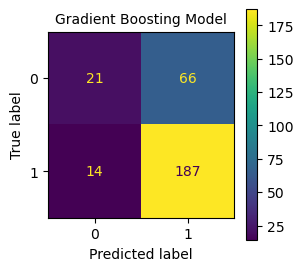

In [76]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelgb, X_test, y_test, ax=ax)
plt.title('Gradient Boosting Model',fontsize = 10)

- Gradient Boosting classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 253 times, and negatives 35 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for Gradient Boosting Model

Text(0.5, 0, 'False Positive Rate')

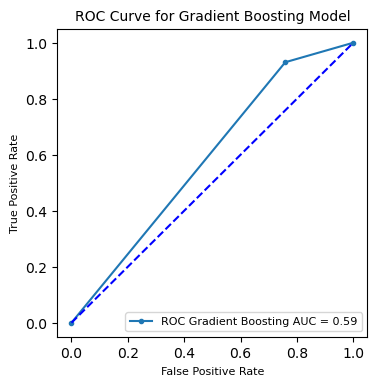

In [77]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(gb_fpr, gb_tpr, marker='.', label = 'ROC Gradient Boosting AUC = %0.2f' % auc_gb)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for Gradient Boosting Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

The ROC curve for Gradient Boosting classifier shows improvement in AUC score compared to other classifiers.

##### - Learning Curve for Gradient Boosting Model

In [78]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelgb,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

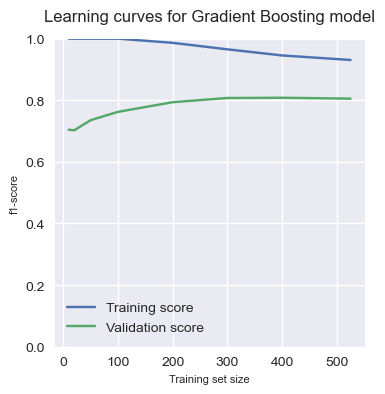

In [79]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for Gradient Boosting model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

The curve above shows similar results to AdaBoost classifier
- The curves converges with smaller rate and adding more training data might help improve the results.
- Huge gap between the curves indicates high variance.

#### iv) XGBoost Classifier

In [80]:
import xgboost as xgb
modelxg=xgb.XGBClassifier()
result=modelxg.fit(X_train, y_train)

In [81]:
ypredxg = modelxg.predict(X_test)

acc_xg = metrics.accuracy_score(y_test, ypredxg)
prec_xg = metrics.precision_score(y_test, ypredxg)
rec_xg = metrics.recall_score(y_test, ypredxg)
f1_xg = metrics.f1_score(y_test, ypredxg) 
confusion_matrix = metrics.confusion_matrix(y_test, ypredxg)
classification = metrics.classification_report(y_test, ypredxg)
xg_fpr , xg_tpr, _ = roc_curve(y_test, ypredxg)
auc_xg = metrics.auc(xg_fpr, xg_tpr)
print()
print('============================== XGBoost Model Evaluation ==============================')
print()
print ("Model Accuracy:" "\n", acc_xg)
print()
print("AUC:" "\n", auc_xg)
print()
print("Classification report:" "\n", classification) 
print()


============================== XGBoost Model Evaluation ==============================

Model Accuracy:
 0.6840277777777778

AUC:
 0.5617601646937725

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.25      0.33        87
           1       0.73      0.87      0.79       201

    accuracy                           0.68       288
   macro avg       0.59      0.56      0.56       288
weighted avg       0.65      0.68      0.65       288




Classification report shows that XGBoost classifier gives biased results towards class label 1.

##### - Confusion Matrix Plot for XGBoost Model

Text(0.5, 1.0, 'XGBoost Model')

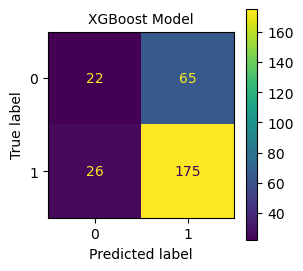

In [82]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(modelxg, X_test, y_test, ax=ax)
plt.title('XGBoost Model',fontsize = 10)

- XGBoost classifier made a total of 288 predictions.
- Out of those 288 cases, the classifier predicted positives 240 times, and negatives 48 times.
- In reality, 201 cases are positives, and 87 cases are negative. 

##### - ROC curve for XGBoost Model

Text(0.5, 0, 'False Positive Rate')

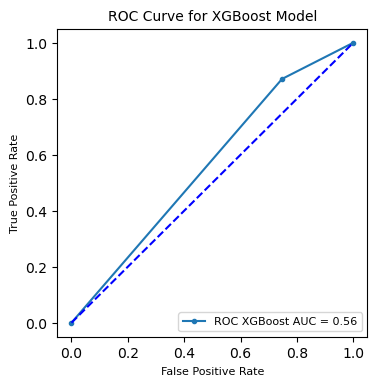

In [83]:
plt.style.use('default')
plt.figure(figsize=(4,4))
plt.plot(xg_fpr, xg_tpr, marker='.', label = 'ROC XGBoost AUC = %0.2f' % auc_xg)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right', prop={'size': 8})
plt.title('ROC Curve for XGBoost Model', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.xlabel('False Positive Rate', fontsize = 8)

ROC curve for XGBoost classifier shows that AUC score is better than 0.5 but much lower than 1. (0.56)

##### - Learning Curve for XGBoost Model

In [84]:
train_sizes =  [10,20, 50, 100, 200, 300, 400, 525]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelxg,
X = X_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

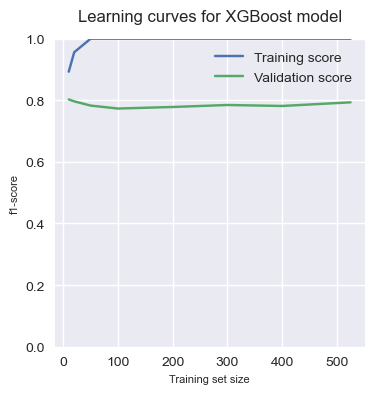

In [85]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('f1-score', fontsize = 8)
plt.xlabel('Training set size', fontsize = 8)
plt.title('Learning curves for XGBoost model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

- Training score increases to maximum and remains constant regardless of training set size indicating severe overfitting.
- Huge gap between the curves indicates high variance case.

#### Tabulated Results for Algorithm Scores

In [86]:
table = pd.DataFrame({'Algorithm': ['Logistic Regression', 'KNN','Decision Tree','Naive Bayes','SVM','Random Forest',
                                     'AdaBoost','Gradient Boosting','XGBoost'], 
                      'Accuracy (%)': [acc_lr*100,acc_knn*100,acc_dt*100,acc_nb*100,acc_sv*100,acc_rf*100,acc_ad*100,
                                       acc_gb*100,acc_xg*100], 
                      'Precision (%)': [prec_lr*100,prec_knn*100,prec_dt*100,prec_nb*100,prec_sv*100,prec_rf*100,prec_ad*100,
                                       prec_gb*100,prec_xg*100],
                      'Recall (%)': [rec_lr*100,rec_knn*100,rec_dt*100,rec_nb*100,rec_sv*100,rec_rf*100,rec_ad*100,rec_gb*100,
                                    rec_xg*100],
                      'F1-Score (%)': [f1_lr*100,f1_knn*100,f1_dt*100,f1_nb*100,f1_sv*100,f1_rf*100,f1_ad*100,f1_gb*100,
                                       f1_xg*100]})

print('============================== Model Evaluation Summary  ===================================')
table.round(3)

============================== Model Evaluation Summary  ===================================


,Algorithm,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
0,Logistic Regression,71.528,71.795,97.512,82.700
1,KNN,68.403,72.177,89.055,79.733
2,Decision Tree,67.708,75.234,80.100,77.590
3,Naive Bayes,67.708,71.951,88.060,79.195
4,SVM,64.931,71.368,83.085,76.782
5,Random Forest,68.403,72.000,89.552,79.823
6,AdaBoost,71.875,73.810,92.537,82.119
7,Gradient Boosting,72.222,73.913,93.035,82.379
8,XGBoost,68.403,72.917,87.065,79.365


The table above shows comparison of all algorithms.
- From the table it is observed that logistic regression algorithm gives best recall and F1-score.
- Decision Tree algorithm gives best Precision but lowest recall rate.
- Gradient Boosting algorithm gives best accuracy. 
- SVM gives lowest accuracy.

In conclusion Logistic Regression algorithm is the best possible classification agorithm for this problem because it gives best recall and F1 score and accuracy, precision is also decent compared to other classifiers. Furthermore, the learning curve for logistic regression also indicated better results as the validation curve was able to generalize the results with little bias.

#### ROC Curves Comparison

Text(0.5, 0, 'False Positive Rate')

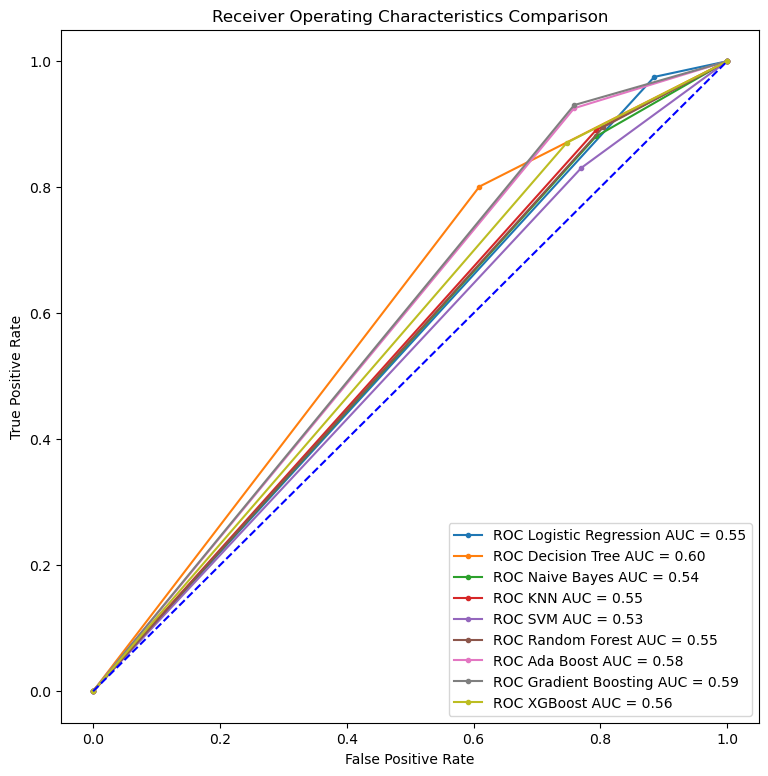

In [87]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(9,9))
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'ROC Logistic Regression AUC = %0.2f' % auc_lr)
plt.plot(dt_fpr, dt_tpr, marker='.', label = 'ROC Decision Tree AUC = %0.2f' % auc_dt)
plt.plot(nb_fpr, nb_tpr, marker='.', label = 'ROC Naive Bayes AUC = %0.2f' % auc_nb)
plt.plot(knn_fpr, knn_tpr, marker='.', label = 'ROC KNN AUC = %0.2f' % auc_knn)
plt.plot(sv_fpr, sv_tpr, marker='.', label = 'ROC SVM AUC = %0.2f' % auc_sv)
plt.plot(rf_fpr, rf_tpr, marker='.', label = 'ROC Random Forest AUC = %0.2f' % auc_rf)
plt.plot(ad_fpr, ad_tpr, marker='.', label = 'ROC Ada Boost AUC = %0.2f' % auc_ad)
plt.plot(gb_fpr, gb_tpr, marker='.', label = 'ROC Gradient Boosting AUC = %0.2f' % auc_gb)
plt.plot(xg_fpr, xg_tpr, marker='.', label = 'ROC XGBoost AUC = %0.2f' % auc_xg)
plt.plot([0, 1], [0, 1],'b--')
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristics Comparison')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The above plot shows comparison of ROC curves for all classifiers.
- Decision Tree algorithm givs best AUC score and SVM algorithm gives least AUC scores.
- It means that Decision Tree classifier was able to detect more numbers of True positives and True negatives compared to other algorithms.
- This fact is further evident from the precision score of Decision Tree algorithm as it is highest compared to other classifiers.

### 4. Hyper Parameter Tuning of Algorithms

In this section, I will change the hyper parameters of each algorithm and find the parameters that give best auc score. I will also plot validation curves for each algorithm and tabulate the results for comparison.

#### 1. Logistic Regression Algorithm

In [92]:
from sklearn.model_selection import GridSearchCV as gs
grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'solver':['newton-cg', 'lbfgs', 'liblinear']}
clf = LogisticRegression()
lr_clf=gs(clf,param_grid = grid_values,cv=5,scoring='roc_auc')
result=lr_clf.fit(X_train, y_train)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score

ypredlr1 = lr_clf.predict(X_test)

acc_lr1 = accuracy_score(y_test, ypredlr1)*100
lr1_fpr , lr1_tpr, _ = roc_curve(y_test, ypredlr1)
auc_lr1 = auc(lr1_fpr, lr1_tpr)*100
pre_lr1 = precision_score(y_test, ypredlr1)*100
rec_lr1 = recall_score(y_test, ypredlr1)*100
f1_lr1 = f1_score(y_test, ypredlr1)*100
lr_score = lr_clf.best_score_*100
print("Accuracy of Logistic Regression (%): \n", acc_lr1)
print("AUC of Logistic Regression (%): \n",auc_lr1)
print("Precision: \n",pre_lr1)
print("Recall (%): \n",rec_lr1)
print("F1 Score(%): \n", f1_lr1)
# examine the best model
print("Best Score (%): \n",lr_clf.best_score_*100)
print("Best Parametres : \n", lr_clf.best_params_)
print("Best Estimator : \n", lr_clf.best_estimator_)

Accuracy of Logistic Regression (%): 
 73.61111111111111
AUC of Logistic Regression (%): 
 58.2775776290959
Precision: 
 73.58490566037736
Recall (%): 
 97.01492537313433
F1 Score(%): 
 83.69098712446352
Best Score (%): 
 62.02850877192982
Best Parametres : 
 {'C': 25, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator : 
 LogisticRegression(C=25, solver='newton-cg')


- I chose different C parameters and solvers to tune hyper parameters for Logistic Regression which would give best auc score.
- I used Grid Search method for hyperparameter tuning.

##### - Validation Curve for Logistic Regression Model

In [94]:
from sklearn.model_selection import validation_curve
Cparam =  [0.001,.009,0.01,.09,1,5,10,25]

train_scores, validation_scores = validation_curve(
estimator = lrmodel,
X = X_train ,
y = y_train, param_name = 'C', param_range = Cparam, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

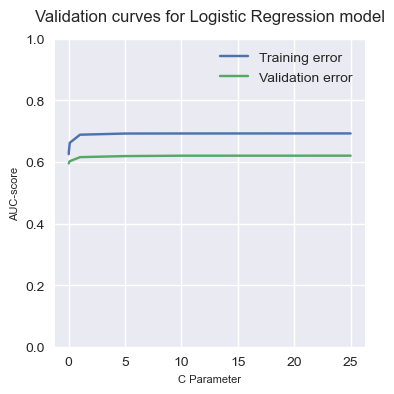

In [96]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(Cparam, train_scores_mean, label = 'Training score')
plt.plot(Cparam, validation_scores_mean, label = 'Validation score')
plt.ylabel('AUC-score', fontsize = 8)
plt.xlabel('C Parameter', fontsize = 8)
plt.title('Validation curves for Logistic Regression model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

The plot above shows AUC score for training and validation data plotted against C parameter of Logistic Regression.
- It is evident from the plot that as C parameter increases, both scores increases then becomes constant.
- Both the validation curve and the training curve looks similar.
- The best C parameter is 25 because validation curves is increasing till this value.

#### ii) KNN Algorithm

In [97]:
grid_values = {'n_neighbors':[2,3,4,5,6,7,8,9,10,12,15,20,25],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
clf = KNeighborsClassifier()
knn_clf=gs(clf,param_grid = grid_values,cv=5,scoring='roc_auc')
result=knn_clf.fit(X_train, y_train)

In [98]:
ypredknn1 = knn_clf.predict(X_test)

acc_knn1 = accuracy_score(y_test, ypredknn1)*100
knn1_fpr , knn1_tpr, _ = roc_curve(y_test, ypredknn1)
auc_knn1 = auc(knn1_fpr, knn1_tpr)*100
pre_knn1 = precision_score(y_test, ypredknn1)*100
rec_knn1 = recall_score(y_test, ypredknn1)*100
f1_knn1 = f1_score(y_test, ypredknn1)*100
knn_score = knn_clf.best_score_*100
print("Accuracy of KNN (%): \n", acc_knn1)
print("AUC of KNN (%): \n",auc_knn1)
print("Precision: \n",pre_knn1)
print("Recall (%): \n",rec_knn1)
print("F1 Score(%): \n", f1_knn1)
# examine the best model
print("Best Score (%): \n",knn_clf.best_score_*100)
print("Best Parametres : \n", knn_clf.best_params_)
print("Best Estimator : \n", knn_clf.best_estimator_)

Accuracy of KNN (%): 
 68.40277777777779
AUC of KNN (%): 
 54.8721907702865
Precision: 
 72.17741935483872
Recall (%): 
 89.05472636815921
F1 Score(%): 
 79.7327394209354
Best Score (%): 
 58.40186403508771
Best Parametres : 
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
Best Estimator : 
 KNeighborsClassifier(leaf_size=1, n_jobs=-1)


- I chose different n_neighbors, leaf_size, weights and algorithm to tune hyper parameters for KNN which would give best auc score.
- I used Grid Search method for hyperparameter tuning.

##### - Validation Curve for KNN Model

In [99]:
param =  [2,3,4,5,6,7,8,9,10,12,15,20,25]

train_scores, validation_scores = validation_curve(
estimator = modelk,
X = X_train ,
y = y_train, param_name = 'n_neighbors', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

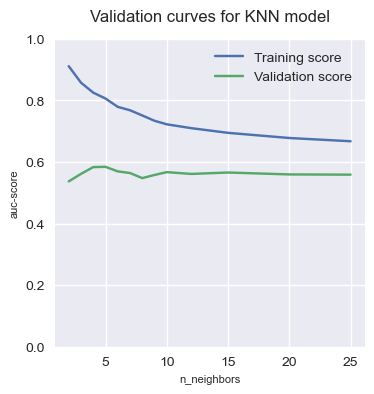

In [100]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 8)
plt.xlabel('n_neighbors', fontsize = 8)
plt.title('Validation curves for KNN model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

The plot above shows AUC score for training and validation data plotted against n neighbors parameter of KNN algorithm.
- It is evident from the plot that as n neighbors increases, the training score decreases and validation curve increases until it reaches 5 neighbors after which it decreases and becomes constant.
- We can observe that ‘k’ = 5 would be the ideal value of k. As the validation curve yields best auc score at k = 5.

#### iii) Decision Tree Algorithm

In [101]:
from sklearn.model_selection import RandomizedSearchCV as rs
grid_values = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': range(10,100,15), 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'max_depth': range(1,200,1),
          'random_state':[123]}
clf_tree=tree.DecisionTreeClassifier()
tree_clf=rs(clf_tree,grid_values,cv=5,scoring='roc_auc')
result=tree_clf.fit(X_train, y_train)

In [102]:
ypreddt1 = tree_clf.predict(X_test)

acc_dt1 = accuracy_score(y_test, ypreddt1)*100
dt1_fpr , dt1_tpr, _ = roc_curve(y_test, ypreddt1)
auc_dt1 = auc(dt1_fpr, dt1_tpr)*100
pre_dt1 = precision_score(y_test, ypreddt1)*100
rec_dt1 = recall_score(y_test, ypreddt1)*100
f1_dt1 = f1_score(y_test, ypreddt1)*100
dt_score = tree_clf.best_score_*100
print("Accuracy of Decision Tree (%): \n", acc_dt1)
print("AUC of Decision Tree (%): \n",auc_dt1)
print("Precision: \n",pre_dt1)
print("Recall (%): \n",rec_dt1)
print("F1 Score(%): \n", f1_dt1)
# examine the best model
print("Best Score (%): \n",tree_clf.best_score_*100)
print("Best Parametres : \n", tree_clf.best_params_)
print("Best Estimator : \n", tree_clf.best_estimator_)

Accuracy of Decision Tree (%): 
 65.625
AUC of Decision Tree (%): 
 53.534053868588096
Precision: 
 71.61016949152543
Recall (%): 
 84.07960199004975
F1 Score(%): 
 77.34553775743707
Best Score (%): 
 58.884320175438596
Best Parametres : 
 {'random_state': 123, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 132}
Best Estimator : 
 DecisionTreeClassifier(max_depth=132, max_features='log2', min_samples_leaf=10,
                       min_samples_split=10, random_state=123)


- I chose different max_features, min_samples_split, min_samples_leaf and max_depth to tune hyper parameters for Decision Tree which would give best auc score.
- I used Random Search method for hyperparameter tuning as grid search would be computational costly.

##### - Validation Curve for Decision Tree Model

In [103]:
param = range(1,200,1)

train_scores, validation_scores = validation_curve(
estimator = dtmodel,
X = X_train ,
y = y_train, param_name = 'max_depth', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

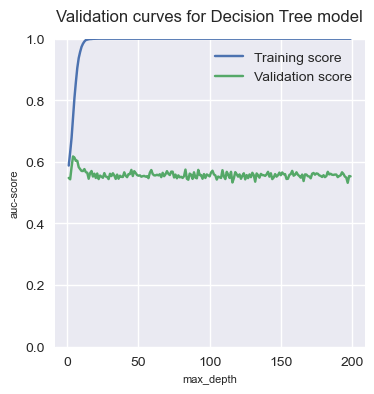

In [104]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 8)
plt.xlabel('max_depth', fontsize = 8)
plt.title('Validation curves for Decision Tree model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

The plot above shows AUC score for training and validation data plotted against max_depth parameter of Decision Tree algorithm.
- It is evident from the plot that as max_depth increases, the training score increases to maximum and remains maximum regardless of max depth. It indicates overfitting.
- The validation score increases till 5 max depth and then decreases and captures disturbances/noise.
- So as max depth is increased, the model has increased variance and overfitting.

#### iv) Naive Bayes Algorithm

In [105]:
grid_values = {'alpha':range(1,100,1),
          'binarize':[0.0],
          'fit_prior':['True', 'False']}
clf = BernoulliNB()
nb_clf=gs(clf,param_grid = grid_values,cv=5,scoring='roc_auc')
result=nb_clf.fit(X_train, y_train)

In [106]:
yprednb1 = nb_clf.predict(X_test)

acc_nb1 = accuracy_score(y_test, yprednb1)*100
nb1_fpr , nb1_tpr, _ = roc_curve(y_test, yprednb1)
auc_nb1 = auc(nb1_fpr, nb1_tpr)*100
pre_nb1 = precision_score(y_test, yprednb1)*100
rec_nb1 = recall_score(y_test, yprednb1)*100
f1_nb1 = f1_score(y_test, yprednb1)*100
nb_score = nb_clf.best_score_*100
print("Accuracy of Naive Bayes (%): \n", acc_nb1)
print("AUC of Naive Bayes (%): \n",auc_nb1)
print("Precision: \n",pre_nb1)
print("Recall (%): \n",rec_nb1)
print("F1 Score(%): \n", f1_nb1)
# examine the best model
print("Best Score (%): \n",nb_clf.best_score_*100)
print("Best Parametres : \n", nb_clf.best_params_)
print("Best Estimator : \n", nb_clf.best_estimator_)

Accuracy of Naive Bayes (%): 
 67.70833333333334
AUC of Naive Bayes (%): 
 54.37467833247555
Precision: 
 71.95121951219512
Recall (%): 
 88.05970149253731
F1 Score(%): 
 79.19463087248323
Best Score (%): 
 57.620614035087726
Best Parametres : 
 {'alpha': 1, 'binarize': 0.0, 'fit_prior': 'True'}
Best Estimator : 
 BernoulliNB(alpha=1, fit_prior='True')


- I chose different alpha to tune hyper parameters for Naive Bayes which would give best auc score.
- I used Grid Search method for hyperparameter tuning.

##### - Validation Curve for Naive Bayes Model

In [107]:
param = range(1,100,1)

train_scores, validation_scores = validation_curve(
estimator = modelb,
X = X_train ,
y = y_train, param_name = 'alpha', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

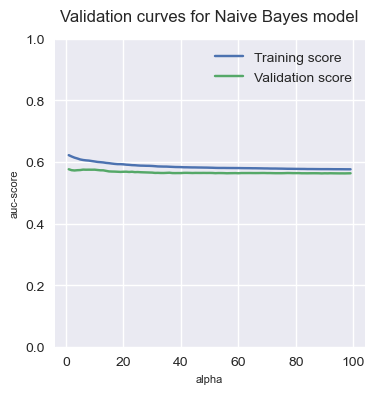

In [108]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 8)
plt.xlabel('alpha', fontsize = 8)
plt.title('Validation curves for Naive Bayes model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

The plot above shows AUC score for training and validation data plotted against alpha parameter of Naive Bayes algorithm.
- It is evident from the plot that as alpha increases, both curves converges until the gap becomes constant.
- The gap between the curve indicates bias.
- The best alpha parameter is 1 as the auc score is highest at this value.

#### v) SVM Algorithm

In [109]:
grid_values = {'C': range(1,100,1), 
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [3,4,5,6,7,8,9,10],
              'gamma': ['scale','auto']}
clf = SVC()
svc_clf=rs(clf,grid_values,cv=5,scoring='roc_auc')
result=svc_clf.fit(X_train, y_train)

In [110]:
ypredsv1 = svc_clf.predict(X_test)

acc_sv1 = accuracy_score(y_test, ypredsv1)*100
sv1_fpr , sv1_tpr, _ = roc_curve(y_test, ypredsv1)
auc_sv1 = auc(sv1_fpr, sv1_tpr)*100
pre_sv1 = precision_score(y_test, ypredsv1)*100
rec_sv1 = recall_score(y_test, ypredsv1)*100
f1_sv1 = f1_score(y_test, ypredsv1)*100
svc_score = svc_clf.best_score_*100
print("Accuracy of SVM (%): \n", acc_sv1)
print("AUC of SVM (%): \n",auc_sv1)
print("Precision: \n",pre_sv1)
print("Recall (%): \n",rec_sv1)
print("F1 Score(%): \n", f1_sv1)

print("Best Score (%): \n",svc_clf.best_score_*100)
print("Best Parametres : \n", svc_clf.best_params_)
print("Best Estimator : \n", svc_clf.best_estimator_)

Accuracy of SVM (%): 
 69.09722222222221
AUC of SVM (%): 
 54.391833933779374
Precision: 
 71.875
Recall (%): 
 91.54228855721394
F1 Score(%): 
 80.52516411378556
Best Score (%): 
 61.10197368421052
Best Parametres : 
 {'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 7, 'C': 57}
Best Estimator : 
 SVC(C=57, degree=7, gamma='auto', kernel='sigmoid')


- I chose different C parameter, kernel and polynomial degree to tune hyper parameters for SVM which would give best auc score.
- I used Random Search method for hyperparameter tuning as grid search would be computational costly.

##### - Validation Curve for SVM Model

In [111]:
param = range(1,100,1)

train_scores, validation_scores = validation_curve(
estimator = modelsv,
X = X_train ,
y = y_train, param_name = 'C', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

(0.0, 1.0)

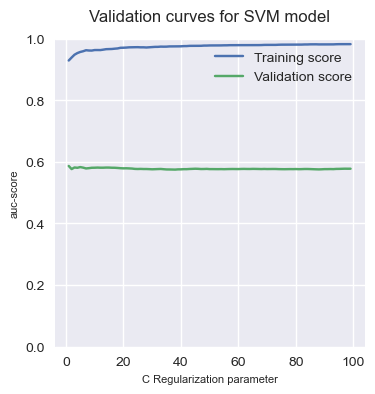

In [112]:
plt.style.use('seaborn')
plt.figure(figsize=(4,4))
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 8)
plt.xlabel('C Regularization parameter', fontsize = 8)
plt.title('Validation curves for SVM model', fontsize = 12, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

The plot above shows AUC score for training and validation data plotted against C Regularization parameter of SVM algorithm.
- It is evident from the plot that as C increases, the training score inceases to maximum indicating overfitting.
- The validation score does not show significant change and is lagging behind which further indicates overfitting.
- C = 1 is the best parameter after which the curve decreased.

#### vi) Random Forest Algorithm

In [113]:
grid_values = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30,50,100,200,300],
          'min_samples_leaf':[1,2,3,4],
          'min_samples_split':[3,4,5,6,7,8,9,10],
          'max_depth': range(1,200,1),
          'random_state':[123],
          'n_jobs':[-1]}
clf_tree=RandomForestClassifier()
rf_clf=rs(clf_tree,grid_values,cv=5,scoring='roc_auc')
result=rf_clf.fit(X_train, y_train)

In [114]:
ypredrf1 = rf_clf.predict(X_test)

acc_rf1 = accuracy_score(y_test, ypredrf1)*100
rf1_fpr , rf1_tpr, _ = roc_curve(y_test, ypredrf1)
auc_rf1 = auc(rf1_fpr, rf1_tpr)*100
pre_rf1 = precision_score(y_test, ypredrf1)*100
rec_rf1 = recall_score(y_test, ypredrf1)*100
f1_rf1 = f1_score(y_test, ypredrf1)*100
rf_score = rf_clf.best_score_*100
print("Accuracy of Decision Tree (%): \n", acc_rf1)
print("AUC of Decision Tree (%): \n",auc_rf1)
print("Precision: \n",pre_rf1)
print("Recall (%): \n",rec_rf1)
print("F1 Score(%): \n", f1_rf1)
# examine the best model
print("Best Score (%): \n",rf_clf.best_score_*100)
print("Best Parametres : \n", rf_clf.best_params_)
print("Best Estimator : \n", rf_clf.best_estimator_)

Accuracy of Decision Tree (%): 
 70.13888888888889
AUC of Decision Tree (%): 
 51.87853834276892
Precision: 
 70.60931899641577
Recall (%): 
 98.00995024875621
F1 Score(%): 
 82.08333333333334
Best Score (%): 
 63.28399122807017
Best Parametres : 
 {'random_state': 123, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 44, 'criterion': 'entropy'}
Best Estimator : 
 RandomForestClassifier(criterion='entropy', max_depth=44, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200, n_jobs=-1,
                       random_state=123)


- I chose different n_estimators, min_samples_leaf, min_samples_split and max_depth to tune hyper parameters for Random Forest which would give best auc score.
- I used Random Search method for hyperparameter tuning as grid search would be computational costly.

##### - Validation Curve for Random Forest Model

In [115]:
param = range(1,200,5)

train_scores, validation_scores = validation_curve(
estimator = modelrf,
X = X_train ,
y = y_train, param_name = 'max_depth', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

In [116]:
param2 = [10,15,20,25,30,50,100,200,300,400]

train_scores, validation_scores = validation_curve(
estimator = modelrf,
X = X_train ,
y = y_train, param_name = 'n_estimators', param_range = param2, cv = 5,
scoring = 'roc_auc')

train_scores_mean2 = train_scores.mean(axis = 1)
validation_scores_mean2 = validation_scores.mean(axis =1 )

(0.0, 1.0)

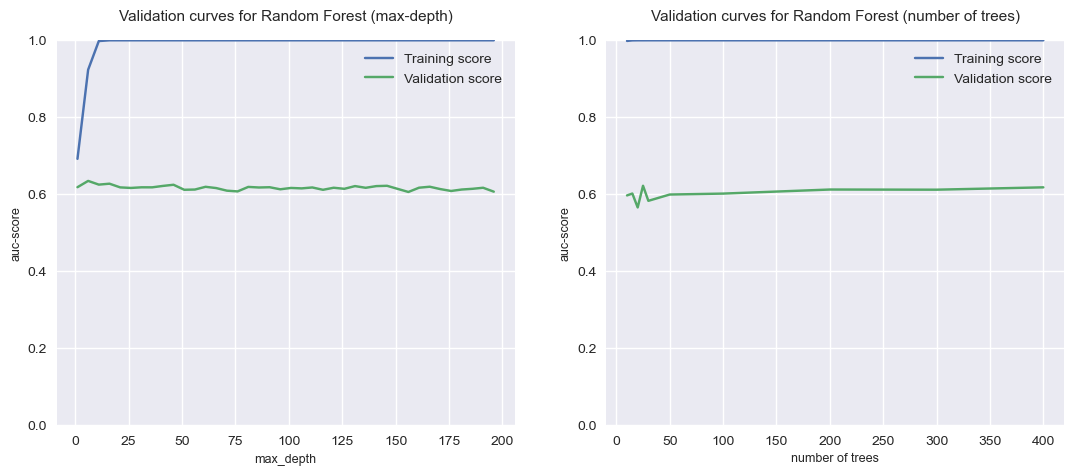

In [117]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.style.use('seaborn')
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('max_depth', fontsize = 9)
plt.title('Validation curves for Random Forest (max-depth)', fontsize = 11, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.style.use('seaborn')
plt.plot(param2, train_scores_mean2, label = 'Training score')
plt.plot(param2, validation_scores_mean2, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('number of trees', fontsize = 9)
plt.title('Validation curves for Random Forest (number of trees)', fontsize = 11, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

##### AUC vs max_depth:
This plot shows AUC score for training and validation data plotted against max_depth of Random Forest algorithm.
- The training curve reaches maximum score relatively quickly and remains maximum and the validation curve is lagging behind, the model is overfitting. This means the model is very complex and there is too little data.
- Best max_depth is 10.

##### AUC vs number of trees:
This plot shows AUC score for training and validation data plotted against number of trees of Random Forest algorithm.
- It shows similar results as first plot. The training curve is maximum and the validation curve shows no significant change after 44 trees indicating that model is overfitting.
- Best number of trees is 38.

##### vii) AdaBoost Algorithm

In [118]:
grid_values = {'n_estimators':[10,15,20,25,30,50,100,200,300],
               'learning_rate':range(1,10,1),
               'random_state':[123]}
clf=AdaBoostClassifier()
ada_clf=gs(clf,grid_values,cv=5,scoring='roc_auc')
result=ada_clf.fit(X_train, y_train)

In [119]:
ypredad1 = ada_clf.predict(X_test)

acc_ad1 = accuracy_score(y_test, ypredad1)*100
ad1_fpr , ad1_tpr, _ = roc_curve(y_test, ypredad1)
auc_ad1 = auc(ad1_fpr, ad1_tpr)*100
pre_ad1 = precision_score(y_test, ypredad1)*100
rec_ad1 = recall_score(y_test, ypredad1)*100
f1_ad1 = f1_score(y_test, ypredad1)*100
ad_score = ada_clf.best_score_*100
print("Accuracy of Decision Tree (%): \n", acc_ad1)
print("AUC of Decision Tree (%): \n",auc_ad1)
print("Precision: \n",pre_ad1)
print("Recall (%): \n",rec_ad1)
print("F1 Score(%): \n", f1_ad1)

print("Best Score (%): \n",ada_clf.best_score_*100)
print("Best Parametres : \n", ada_clf.best_params_)
print("Best Estimator : \n", ada_clf.best_estimator_)

Accuracy of Decision Tree (%): 
 70.13888888888889
AUC of Decision Tree (%): 
 56.76788471435924
Precision: 
 73.09236947791165
Recall (%): 
 90.54726368159204
F1 Score(%): 
 80.88888888888889
Best Score (%): 
 61.53234649122806
Best Parametres : 
 {'learning_rate': 1, 'n_estimators': 20, 'random_state': 123}
Best Estimator : 
 AdaBoostClassifier(learning_rate=1, n_estimators=20, random_state=123)


- I chose different n_estimators and learning_rate to tune hyper parameters for Ada Boost which would give best auc score.
- I used Grid Search method for hyperparameter tuning..

##### - Validation Curves for AdaBoost Model

In [120]:
param = [10,15,20,25,30,50,100,200,300,400]

train_scores, validation_scores = validation_curve(
estimator = modelad,
X = X_train ,
y = y_train, param_name = 'n_estimators', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

In [121]:
param2 = range(1,10,1)

train_scores, validation_scores = validation_curve(
estimator = modelad,
X = X_train ,
y = y_train, param_name = 'learning_rate', param_range = param2, cv = 5,
scoring = 'roc_auc')

train_scores_mean2 = train_scores.mean(axis = 1)
validation_scores_mean2 = validation_scores.mean(axis =1 )

(0.0, 1.0)

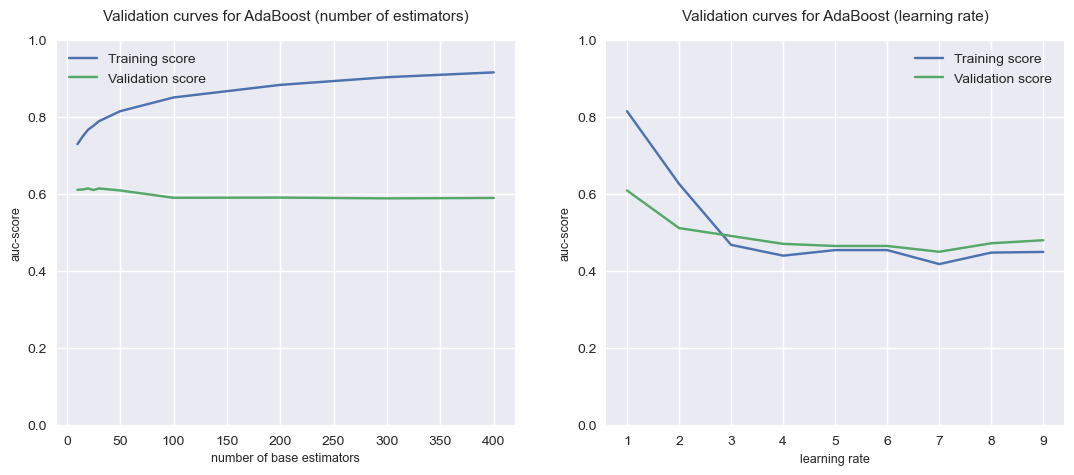

In [122]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.style.use('seaborn')
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('number of base estimators', fontsize = 9)
plt.title('Validation curves for AdaBoost (number of estimators)', fontsize = 11, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.style.use('seaborn')
plt.plot(param2, train_scores_mean2, label = 'Training score')
plt.plot(param2, validation_scores_mean2, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('learning rate', fontsize = 9)
plt.title('Validation curves for AdaBoost (learning rate)', fontsize = 11, y = 1.03)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

##### AUC vs number of base estimators:
This plot shows AUC score for training and validation data plotted against number of base estimators of Ada Boost algorithm.
- The training curve reaches high score gradually and increases in slow rate and the validation curve is lagging behind. The gap between curves is increasing. The model is overfitting.
- Best number of base estimators is 20.

##### AUC vs learning rate:
This plot shows AUC score for training and validation data plotted against learning rate of Ada Boost algorithm.
- With increasing learning rate, both curves decreases rapidly and after learning rate 3, the curves fluctuates around certain score. It indicates poor performance of model after learning rate = 1.
- Best learning rate is 1.

#### viii) Graident Boosting Algorithm

In [123]:
grid_values = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
               'n_estimators':[10,15,20,25,30,50,100,200,300],
               'max_depth':range(1,50,1),
               'min_samples_split':range(2,10,1),
               'min_samples_leaf':range(1,5,1),
               'max_features':list(range(1,df1.shape[1]))}
clf=GradientBoostingClassifier()
gb_clf=rs(clf,grid_values,cv=5,scoring='roc_auc')
result=gb_clf.fit(X_train, y_train)

In [124]:
ypredgb1 = gb_clf.predict(X_test)

acc_gb1 = accuracy_score(y_test, ypredgb1)*100
gb1_fpr , gb1_tpr, _ = roc_curve(y_test, ypredgb1)
auc_gb1 = auc(gb1_fpr, gb1_tpr)*100
pre_gb1 = precision_score(y_test, ypredgb1)*100
rec_gb1 = recall_score(y_test, ypredgb1)*100
f1_gb1 = f1_score(y_test, ypredgb1)*100
gb_score = gb_clf.best_score_*100
print("Accuracy of Decision Tree (%): \n", acc_gb1)
print("AUC of Decision Tree (%): \n",auc_gb1)
print("Precision: \n",pre_gb1)
print("Recall (%): \n",rec_gb1)
print("F1 Score(%): \n", f1_gb1)
# examine the best model
print("Best Score (%): \n",gb_clf.best_score_*100)
print("Best Parametres : \n", gb_clf.best_params_)
print("Best Estimator : \n", gb_clf.best_estimator_)

Accuracy of Decision Tree (%): 
 69.44444444444444
AUC of Decision Tree (%): 
 53.01080802882141
Precision: 
 71.16104868913857
Recall (%): 
 94.5273631840796
F1 Score(%): 
 81.19658119658119
Best Score (%): 
 62.63157894736844
Best Parametres : 
 {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 3, 'max_depth': 49, 'learning_rate': 0.01}
Best Estimator : 
 GradientBoostingClassifier(learning_rate=0.01, max_depth=49, max_features=3,
                           min_samples_leaf=4, min_samples_split=4,
                           n_estimators=200)


- I chose different learning_rate, n_estimators, max_depth, min_samples_split, min_samples_leaf and max_features to tune hyper parameters for Gradient Boosting which would give best auc score.
- I used Random Search method for hyperparameter tuning as grid search would be computational costly.

##### - Validation Curves for Gradient Boosting Algorithm

In [125]:
param = [2, 1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_scores, validation_scores = validation_curve(
estimator = modelgb,
X = X_train ,
y = y_train, param_name = 'learning_rate', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

In [126]:
param2 = [10,15,20,25,30,50,100,200,300]

train_scores, validation_scores = validation_curve(
estimator = modelgb,
X = X_train ,
y = y_train, param_name = 'n_estimators', param_range = param2, cv = 5,
scoring = 'roc_auc')

train_scores_mean2 = train_scores.mean(axis = 1)
validation_scores_mean2 = validation_scores.mean(axis =1 )

In [127]:
param3 = range(1,30,1)

train_scores, validation_scores = validation_curve(
estimator = modelgb,
X = X_train ,
y = y_train, param_name = 'max_depth', param_range = param3, cv = 5,
scoring = 'roc_auc')

train_scores_mean3 = train_scores.mean(axis = 1)
validation_scores_mean3 = validation_scores.mean(axis = 1)

In [128]:
param4 = list(range(1,df1.shape[1]))

train_scores, validation_scores = validation_curve(
estimator = modelgb,
X = X_train ,
y = y_train, param_name = 'max_features', param_range = param4, cv = 5,
scoring = 'roc_auc')

train_scores_mean4 = train_scores.mean(axis = 1)
validation_scores_mean4 = validation_scores.mean(axis = 1)

(0.0, 1.0)

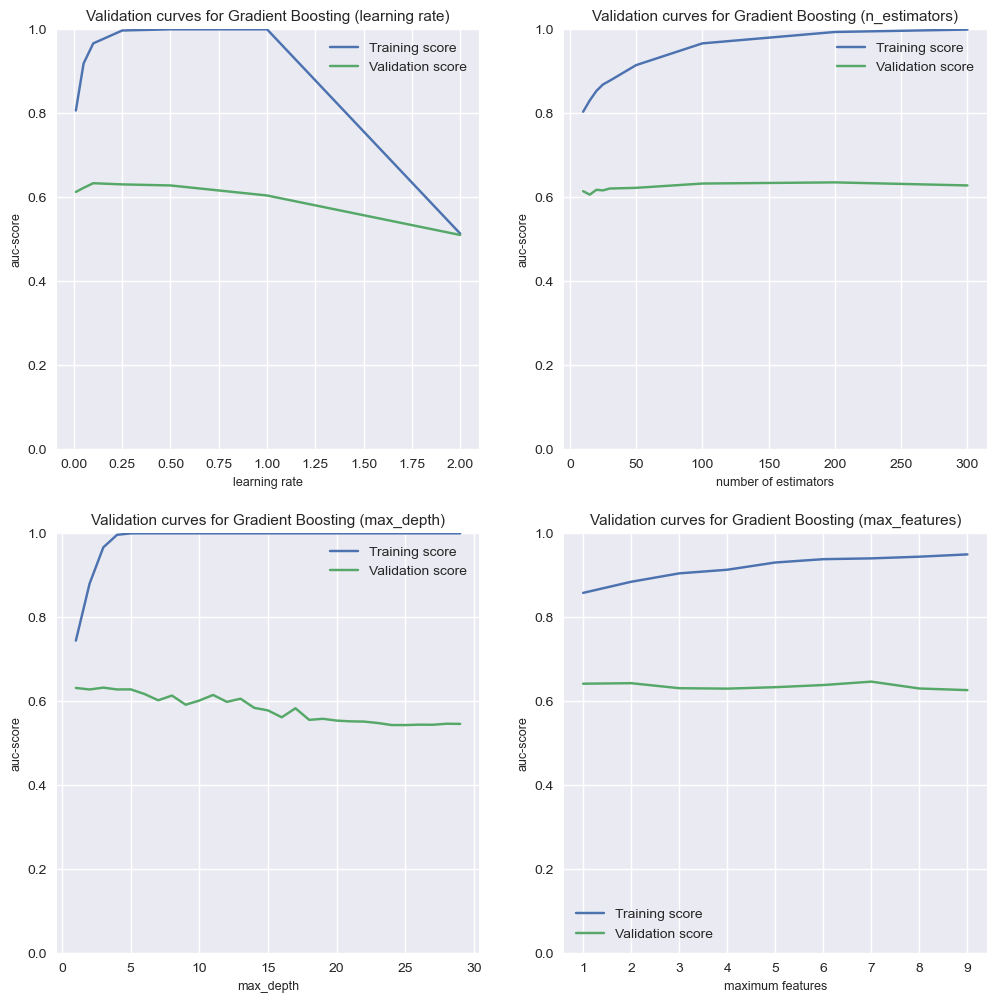

In [129]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid((2,2),(0,0))
plt.style.use('seaborn')
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('learning rate', fontsize = 9)
plt.title('Validation curves for Gradient Boosting (learning rate)', fontsize = 11, y=1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

ax1 = plt.subplot2grid((2,2),(0,1))
plt.style.use('seaborn')
plt.plot(param2, train_scores_mean2, label = 'Training score')
plt.plot(param2, validation_scores_mean2, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('number of estimators', fontsize = 9)
plt.title('Validation curves for Gradient Boosting (n_estimators)', fontsize = 11, y = 1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

ax1 = plt.subplot2grid((2,2),(1,0))
plt.style.use('seaborn')
plt.plot(param3, train_scores_mean3, label = 'Training score')
plt.plot(param3, validation_scores_mean3, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('max_depth', fontsize = 9)
plt.title('Validation curves for Gradient Boosting (max_depth)', fontsize = 11, y = 1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

ax1 = plt.subplot2grid((2,2),(1,1))
plt.style.use('seaborn')
plt.plot(param4, train_scores_mean4, label = 'Training score')
plt.plot(param4, validation_scores_mean4, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('maximum features', fontsize = 9)
plt.title('Validation curves for Gradient Boosting (max_features)', fontsize = 11, y = 1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

##### AUC vs learning rate:
This plot shows AUC score for training and validation data plotted against learning rate of Gradient Boosting algorithm.
- As the learning rate increases, the training curve reaches maximum score gradually and after learning rate = 1, it decreases. - The validation curve increases then after learning rate = 0.01 it decreases.
- The curve indicates poor performance of model with increasing learning rate.
- Best learning rate is 0.01.

##### AUC vs number of estimators:
This plot shows AUC score for training and validation data plotted against number of estimators of Gradient Boosting algorithm.
- With increasing number of estimators, the training curve reaches maximum score gradually and the validation curve is lagging behind. The gap between curves is increasing. The model is overfitting.
- Best number of estimators is 200.

##### AUC vs max_depth:
This plot shows AUC score for training and validation data plotted against max_depth of Gradient Boosting algorithm.
- The curve shows similar result as second plot. With increasing max_depth, the training curve reaches maximum score and the validation curve is lagging behind.
- Increased gap indicates overfitting.
- Best max_depth is 4.

##### AUC vs max_features:
This plot shows AUC score for training and validation data plotted against max_features of Gradient Boosting algorithm.
- With increasing maximum features, the training score increases and validation scores does not change much indicating overfitting.
- Best maximum features are 2.

#### ix) XGBoost Algorithm

In [130]:
grid_values = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
               'n_estimators':[10,15,20,25,30,50,100,200,300,500,1000],
               'max_depth':range(1,50,1),
               'min_child_weight':range(2,10,1),
               'max_delta_step':range(1,5,1),
               'gamma':range(0,5,1)}
clf=xgb.XGBClassifier()
xgb_clf=rs(clf,grid_values,cv=5,scoring='roc_auc')
result=xgb_clf.fit(X_train, y_train)

In [131]:
ypredxg1 = xgb_clf.predict(X_test)

acc_xg1 = accuracy_score(y_test, ypredxg1)*100
xg1_fpr , xg1_tpr, _ = roc_curve(y_test, ypredxg1)
auc_xg1 = auc(xg1_fpr, xg1_tpr)*100
pre_xg1 = precision_score(y_test, ypredxg1)*100
rec_xg1 = recall_score(y_test, ypredxg1)*100
f1_xg1 = f1_score(y_test, ypredxg1)*100
xg_score = xgb_clf.best_score_*100
print("Accuracy of Decision Tree (%): \n", acc_xg1)
print("AUC of Decision Tree (%): \n",auc_xg1)
print("Precision: \n",pre_xg1)
print("Recall (%): \n",rec_xg1)
print("F1 Score(%): \n", f1_xg1)

print("Best Score (%): \n",xgb_clf.best_score_*100)
print("Best Parametres : \n", xgb_clf.best_params_)
print("Best Estimator : \n", xgb_clf.best_estimator_)

Accuracy of Decision Tree (%): 
 69.79166666666666
AUC of Decision Tree (%): 
 53.91147709727227
Precision: 
 71.5909090909091
Recall (%): 
 94.02985074626866
F1 Score(%): 
 81.29032258064515
Best Score (%): 
 65.6003289473684
Best Parametres : 
 {'n_estimators': 25, 'min_child_weight': 4, 'max_depth': 43, 'max_delta_step': 3, 'learning_rate': 0.05, 'gamma': 0}
Best Estimator : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=3, max_depth=43,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


- I chose different learning_rate, n_estimators, max_depth, min_child_weight, max_delta_step and gamma to tune hyper parameters for XGBoost which would give best auc score.
- I used Random Search method for hyperparameter tuning as grid search would be computational costly.

##### - Validation Curves for XGBoost Algorithm

In [132]:
param = [2, 1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_scores, validation_scores = validation_curve(
estimator = modelxg,
X = X_train ,
y = y_train, param_name = 'learning_rate', param_range = param, cv = 5,
scoring = 'roc_auc')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )

In [133]:
param2 = [10,15,20,25,30,50,100,200,300,500,1000]

train_scores, validation_scores = validation_curve(
estimator = modelxg,
X = X_train ,
y = y_train, param_name = 'n_estimators', param_range = param2, cv = 5,
scoring = 'roc_auc')

train_scores_mean2 = train_scores.mean(axis = 1)
validation_scores_mean2 = validation_scores.mean(axis =1 )

In [134]:
param3 = range(1,50,1)

train_scores, validation_scores = validation_curve(
estimator = modelxg,
X = X_train ,
y = y_train, param_name = 'max_depth', param_range = param3, cv = 5,
scoring = 'roc_auc')

train_scores_mean3 = train_scores.mean(axis = 1)
validation_scores_mean3 = validation_scores.mean(axis = 1)

In [135]:
param4 = range(2,10,1)

train_scores, validation_scores = validation_curve(
estimator = modelxg,
X = X_train ,
y = y_train, param_name = 'min_child_weight', param_range = param4, cv = 5,
scoring = 'roc_auc')

train_scores_mean4 = train_scores.mean(axis = 1)
validation_scores_mean4 = validation_scores.mean(axis = 1)

(0.0, 1.0)

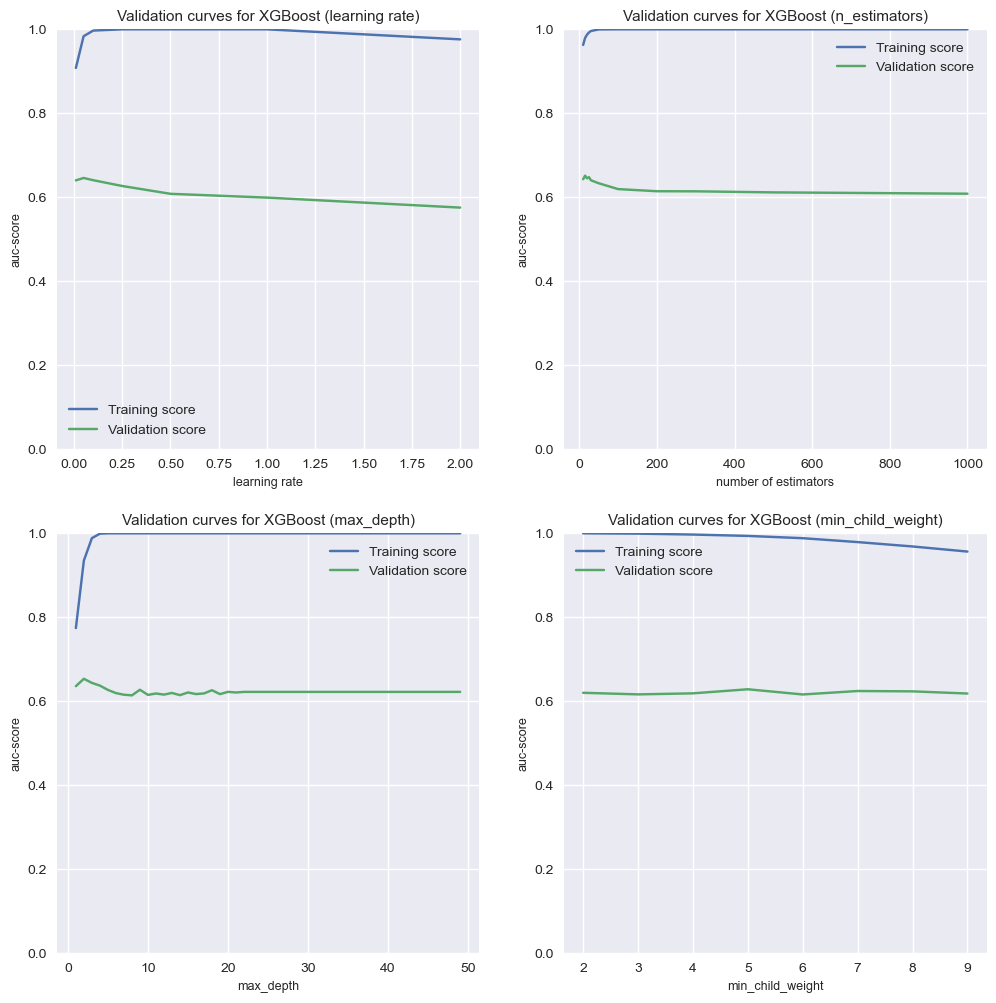

In [136]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid((2,2),(0,0))
plt.style.use('seaborn')
plt.plot(param, train_scores_mean, label = 'Training score')
plt.plot(param, validation_scores_mean, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('learning rate', fontsize = 9)
plt.title('Validation curves for XGBoost (learning rate)', fontsize = 11, y=1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

ax1 = plt.subplot2grid((2,2),(0,1))
plt.style.use('seaborn')
plt.plot(param2, train_scores_mean2, label = 'Training score')
plt.plot(param2, validation_scores_mean2, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('number of estimators', fontsize = 9)
plt.title('Validation curves for XGBoost (n_estimators)', fontsize = 11, y = 1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

ax1 = plt.subplot2grid((2,2),(1,0))
plt.style.use('seaborn')
plt.plot(param3, train_scores_mean3, label = 'Training score')
plt.plot(param3, validation_scores_mean3, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('max_depth', fontsize = 9)
plt.title('Validation curves for XGBoost (max_depth)', fontsize = 11, y = 1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

ax1 = plt.subplot2grid((2,2),(1,1))
plt.style.use('seaborn')
plt.plot(param4, train_scores_mean4, label = 'Training score')
plt.plot(param4, validation_scores_mean4, label = 'Validation score')
plt.ylabel('auc-score', fontsize = 9)
plt.xlabel('min_child_weight', fontsize = 9)
plt.title('Validation curves for XGBoost (min_child_weight)', fontsize = 11, y = 1.0)
plt.legend(prop={'size': 10})
plt.ylim(0,1)

##### AUC vs learning rate:
This plot shows AUC score for training and validation data plotted against learning rate of XGBoost algorithm.
- As the learning rate increases, the training curve reaches maximum score rapidly.
- The validation curve increases then after learning rate = 0.01 it decreases.
- The curve indicates poor performance of model with increasing learning rate.
- Model is overfitting.
- Best learning rate is 0.01.

##### AUC vs number of estimators:
This plot shows AUC score for training and validation data plotted against number of estimators of XGBoost algorithm.
- With increasing number of estimators, the training curve reaches maximum score and the validation curve is lagging behind. The gap between curves is increasing. The model is overfitting.
- Best number of estimators is 25.

##### AUC vs max_depth:
This plot shows AUC score for training and validation data plotted against max_depth of XGBoost algorithm.
- The curve shows similar result as second plot. With increasing max_depth, the training curve reaches maximum score and the validation curve is lagging behind.
- Increased gap indicates overfitting.
- Best max_depth is 4.

##### AUC vs min_child_weight:
This plot shows AUC score for training and validation data plotted against min_child_weight of XGBoost algorithm.
- With increasing minimum child_weight features, the training score decreases slowly and validation scores does not change much indicating overfitting.
- Best minimum child_weight is 5.

#### Tabulated Results for Algorithm Scores (Hyper parameter Tuned)

In [137]:
table2 = pd.DataFrame({'Algorithm': ['Logistic Regression', 'KNN','Decision Tree','Naive Bayes','SVM','Random Forest',
                                     'AdaBoost','Gradient Boosting','XGBoost'], 
                      'Accuracy (%)': [acc_lr1,acc_knn1,acc_dt1,acc_nb1,acc_sv1,acc_rf1,acc_ad1,acc_gb1,acc_xg1], 
                      'Precision (%)': [pre_lr1,pre_knn1,pre_dt1,pre_nb1,pre_sv1,pre_rf1,pre_ad1,pre_gb1,pre_xg1],
                      'Recall (%)': [rec_lr1,rec_knn1,rec_dt1,rec_nb1,rec_sv1,rec_rf1,rec_ad1,rec_gb1,rec_xg1],
                      'F1-Score (%)': [f1_lr1,f1_knn1,f1_dt1,f1_nb1,f1_sv1,f1_rf1,f1_ad1,f1_gb1,f1_xg1],
                      'Best Scores (%)': [lr_score,knn_score,dt_score,nb_score,svc_score,rf_score,ad_score,gb_score,xg_score]})

print('==============================  Hyperparameter Tuning Model Evaluation Summary  ===================================')
table2.round(3)

==============================  Hyperparameter Tuning Model Evaluation Summary  ===================================


,Algorithm,Accuracy (%),Precision (%),Recall (%),F1-Score (%),Best Scores (%)
0,Logistic Regression,73.611,73.585,97.015,83.691,62.029
1,KNN,68.403,72.177,89.055,79.733,58.402
2,Decision Tree,65.625,71.610,84.080,77.346,58.884
3,Naive Bayes,67.708,71.951,88.060,79.195,57.621
4,SVM,69.097,71.875,91.542,80.525,61.102
5,Random Forest,70.139,70.609,98.010,82.083,63.284
6,AdaBoost,70.139,73.092,90.547,80.889,61.532
7,Gradient Boosting,69.444,71.161,94.527,81.197,62.632
8,XGBoost,69.792,71.591,94.030,81.290,65.600


In [138]:
print('==============================  Without Hyperparameter Tuning Model Evaluation Summary  ===================================')
table.round(3)

==============================  Without Hyperparameter Tuning Model Evaluation Summary  ===================================


,Algorithm,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
0,Logistic Regression,71.528,71.795,97.512,82.700
1,KNN,68.403,72.177,89.055,79.733
2,Decision Tree,67.708,75.234,80.100,77.590
3,Naive Bayes,67.708,71.951,88.060,79.195
4,SVM,64.931,71.368,83.085,76.782
5,Random Forest,68.403,72.000,89.552,79.823
6,AdaBoost,71.875,73.810,92.537,82.119
7,Gradient Boosting,72.222,73.913,93.035,82.379
8,XGBoost,68.403,72.917,87.065,79.365


To solve class imbalance problem;
- I used appropriate metric score, auc score to be improved from hyper parameter tuning of algorithms. 
- I used K-fold Cross-Validation as resample method duriing hyper parameter tuning.
- I tried ensemble methods such as Random forest, Ada Boost, Gradient Boosting and XGBoost algorithms.

From, hyper parameter tuning of algorithms, I managed to get better results.